<a href="https://colab.research.google.com/github/creepypers/Classification-diabetiques-avec-SVM/blob/main/Titanic_survivor_projet_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Repartition des taches

Weni aristide abdoul averibou (XGBOOST)

Moussa Diogne (Random Forest)

Bah Oumar diogo (DeepLearning)

# Partie Theorique

**L'accuracy** : Est la precision globale de notre modele il se calcule par le rapport :

                      (𝑉𝑃+𝑉𝑁)/(𝑉𝑃+𝐹𝑃+𝑉𝑃+𝑉𝑁)

Parmis toutes nos predictions lesquels sont tombes justes.

**La précision** désigne le taux de
réussite de prédiction positifs de notre modèle. Elle est calculée par le rapport :

                          (𝑉𝑃)/(𝑉𝑃+𝐹𝑃)

Parmi tout ce que le modèle prédit comme positif, la précision indique la part réellement correcte.Plus elle est proche de 1, plus le modèle fait peu d’erreurs de faux positifs.

**Le rappel** désigne le taux de réussite dans la prédiction des cas positifs par rapport au total de cas positifs réels de notre modèle. Il est calculé par le rapport :

                            𝑉𝑃/(𝑉𝑃+𝐹𝑁)

Plus il est proche de 1, plus notre modèle arrive à bien prédire les cas réellement vrais. Parmi tous les cas réellement positifs, le rappel indique combien le modèle en retrouve.Plus il est proche de 1, plus le modèle rate peu de vrais positifs.

**Le score F1** désigne la moyenne harmonique de la précision et du rappel. Il permet de vérifier que notre modèle est précis dans ses prédictions positives et qu’il détecte bien tous les cas positifs réels. Sa formule est :

                          𝐹1 = 2×(𝑃×𝑅/𝑃+𝑅)


## Courbes

**Courbes d’apprentissage** :

Les courbes d’apprentissage montrent l’évolution des performances d’un modèle en fonction de la quantité de données d’entraînement.

Elles comparent généralement l’erreur sur les données d’entraînement et l’erreur sur les données de validation.

Si les deux erreurs sont élevées, le modèle est en sous-apprentissage (underfitting).
Si l’erreur d’entraînement est faible mais celle de validation élevée, le modèle est en sur-apprentissage (overfitting).

**Courbe ROC** :

La courbe ROC mesure la capacité d’un modèle à distinguer les classes positives et négatives.
Plus la courbe est proche du coin supérieur gauche, meilleur est le modèle.

L’aire sous la courbe (AUC) résume la performance globale :
AUC = 1 correspond à un modèle parfait,
AUC = 0.5 correspond à un modèle aléatoire.

**Courbes Précision–Rappel** :

Les courbes précision–rappel montrent le compromis entre la précision et le rappel pour différents seuils.
Plus la courbe est proche du coin supérieur droit, plus le modèle est performant.

**Matrice de Confusion** :

La matrice de confusion est un tableau qui compare les valeurs réelles aux valeurs prédites par le modèle.

Elle contient :
Vrais Positifs (VP) : prédictions positives correctes
Faux Positifs (FP) : prédictions positives incorrectes
Faux Négatifs (FN) : prédictions négatives incorrectes
Vrais Négatifs (VN) : prédictions négatives correctes

**Erreurs de Validation Croisée** :

La validation croisée consiste à diviser les données en plusieurs parties appelées folds.

Le modèle est entraîné plusieurs fois, chaque fois sur une partie des données, tandis que les autres servent à l’évaluation.

L’erreur de validation croisée correspond à la moyenne des erreurs obtenues sur tous les folds.

Elle permet d’évaluer la capacité de généralisation du modèle.

**Erreurs d’Apprentissage** :

Les erreurs d’apprentissage correspondent aux erreurs calculées sur les données d’entraînement et de validation.

Si les deux erreurs sont élevées, le modèle est en sous-apprentissage.
Si l’erreur d’entraînement est faible mais celle de validation élevée, le modèle est en sur-apprentissage.

Un bon modèle présente des erreurs faibles et proches sur les deux ensembles.

## XGBOOST

### Présentation détaillée de l'algorithme XGBoost

XGBoost, qui signifie eXtreme Gradient Boosting, est une bibliothèque open-source devenue une référence incontournable pour traiter les données structurées. Il fait partie de la famille de l'Ensemble Learning. Le principe est de ne pas se reposer sur un seul modèle, mais de combiner plusieurs modèles plus simples appelés apprenants faibles, généralement des arbres de décision peu profonds. En les assemblant séquentiellement, on obtient un modèle global fort. XGBoost est concretement une implémentation optimisée et régularisée de cette méthode. Il est conçu pour être à la fois plus rapide, plus robuste et plus précis.


### Origine : améliorations de Gradient Boosting

L'algorithme tire son origine du Gradient Boosting classique, mais il lui apporte des améliorations majeures pour combler ses lacunes.
Le principe de base (Gradient Boosting) : L'idée est de construire une suite d'arbres les uns après les autres. Chaque nouvel arbre a pour unique but de corriger les erreurs (les résidus) commises par les arbres précédents. C'est une méthode d'amélioration continue.

Les améliorations apportées par XGBoost (Extreme) : XGBoost est considéré comme une version extrême car il pousse ce concept plus loin grâce à trois optimisations principales :

Une meilleure **vision** mathématique : Là où le Gradient Boosting classique utilise une approche simple pour corriger l'erreur, XGBoost utilise une approximation plus fine (dite du second ordre) pour choisir comment diviser les données et attribuer les poids. Cela lui permet d'être plus précis plus vite.

La **régularisation intégrée** : Contrairement aux anciennes versions, XGBoost inclut directement des pénalités pour empêcher les arbres de devenir trop complexes. Cela aide énormément à éviter le sur-apprentissage (overfitting)

**L'optimisation informatique** : C'est une évolution au niveau industrielle, l'algorithme est capable d'utiliser le calcul parallèle (utiliser tous les cœurs du processeur) et gère intelligemment la mémoire. Cela lui permet de traiter des volumes de données beaucoup plus importants et beaucoup plus rapidement que le boosting traditionnel.

### Fonctionnement

Le fonctionnement de XGBoost repose sur trois piliers principaux qui le rendent à la fois précis et rapide.

1. **Arbres de décision** (Apprentissage séquentiel) XGBoost utilise des arbres de décision comme briques de base. Contrairement à une forêt aléatoire qui construit ses arbres indépendamment les uns des autres, XGBoost les construit séquentiellement (les uns après les autres).

**Correction d'erreurs** : Chaque nouvel arbre a pour unique mission de corriger les erreurs commises par l'ensemble des arbres précédents. Il se concentre sur les exemples difficiles que le modèle n'arrive pas encore à bien prédire.

Apprenants faibles sont Individuellement, des arbres peu profonds, C'est leur addition qui crée un modèle global performant.

2. **Régularisation** (Contrôle de la complexité) C'est une des grandes forces de XGBoost par rapport au Gradient Boosting classique. La régularisation est le mécanisme de sécurité intégré pour empêcher le modèle de faire de l'overfitting.

**Pénalités** : L'algorithme ajoute des pénalités mathématiques comme **L1** et **L2** si un arbre devient trop complexe ou si les poids attribués aux feuilles sont trop extrêmes.

**Élagage (Pruning)** : Lors de la construction, si une branche d'un arbre n'apporte pas un gain de performance suffisant par rapport à la complexité qu'elle ajoute, XGBoost la supprime, c'est pour ca on parle d'élagage, permettant de garder le modèle simple et efficace.

3. **Parallélisation** (Vitesse de calcul) Bien que les arbres soient ajoutés l'un après l'autre de façon séquentielle, XGBoost réussit à être extrêmement rapide grâce à la parallélisation à l'intérieur de la construction de chaque arbre.

**Traitement simultané** : Au lieu d'analyser chaque caractéristique (colonne) une par une pour trouver le meilleur point de coupure, XGBoost utilise tous les cœurs du processeur pour analyser toutes les caractéristiques en même temps.

**Optimisation mémoire** : Il utilise des structures de données optimisées (comme des blocs compressés) et gère intelligemment la mémoire cache de l'ordinateur pour traiter de très grands volumes de données sans ralentir.




### Hyperparamètres clés et leur influence



Nous pouvons les classer en deux catégories : ceux qui gèrent la stratégie d'apprentissage et ceux qui contrôlent la complexité du modèle pour éviter le sur-apprentissage (overfitting).

**Stratégie d'apprentissage (Vitesse et Précision)**

**n_estimators (Nombre d'arbres)**

C'est le nombre total d'arbres que l'algorithme va construire de facon séquentielle.

**Influence** : plus il y a d'arbres, plus le modèle a de chances de corriger ses erreurs et d'affiner ses prédictions.

**Risque** : Un nombre trop élevé augmente le temps de calcul et le risque de sur-apprentissage (le modèle apprend le bruit des données). Il fonctionne en tandem avec le learning rate.

**learning_rate ou eta (Vitesse d'apprentissage)**

C'est un coefficient (souvent entre 0.01 et 0.3) qui réduit l'impact de chaque nouvel arbre ajouté.

**Influence** : une valeur faible (ex: 0.01) rend l'apprentissage plus lent et progressif. Il faut alors beaucoup d'arbres (n_estimators élevé), mais le résultat est souvent plus robuste et généralise mieux.

Une valeur élevée (ex: 0.3) permet d'apprendre vite avec moins d'arbres, mais on risque de manquer l'optimum ou de sur-apprendre.

**Contrôle de la complexité (Anti-Surapprentissage)**
Ces paramètres servent de freins pour empêcher le modèle de devenir trop complexe.

**max_depth (Profondeur maximale)**

C'est la hauteur maximale autorisée pour chaque arbre.

**Influence** : des arbres profonds peuvent capturer des relations très complexes, mais risquent d'apprendre des détails anecdotiques (bruit).

Des arbres peu profonds (3 à 10 niveaux) capturent les tendances principales et sont plus sûrs pour éviter le sur-apprentissage.

**min_child_weight**

C'est la quantité minimale d'exemples (ou somme de poids) nécessaire dans une feuille pour qu'on accepte de la créer.

**Influence** : c'est un paramètre conservateur. Si une règle spécifique ne concerne que très peu de passagers (ex: 1 ou 2), ce seuil empêchera la création d'une feuille pour eux, forçant le modèle à rester plus général.

**gamma (min_split_loss)**

C'est le gain de performance minimal exigé pour autoriser une nouvelle division (split) dans l'arbre.

**Influence** : Si diviser un groupe en deux n'améliore pas le modèle d'au moins la valeur gamma, XGBoost ne le fait pas. Cela agit comme un "élagage" automatique pendant la construction de l'arbre.

**reg_alpha (L1) et reg_lambda (L2)**

Ce sont des pénalités mathématiques ajoutées à l'erreur du modèle.

**Influence**

$Alpha$ ($L1$) : Pousse les poids des variables inutiles vers zéro (sélection de variables). Utile si vous avez beaucoup de colonnes dont certaines ne servent à rien.

$Lambda$ ($L2$) : Empêche les poids de devenir trop grands, ce qui rend le modèle plus stable face aux petites variations des données.

### Avantages par rapport aux autres approches de boosting et utilisation

**Avantages**
XGBoost se distingue des implémentations classiques de boosting (comme le standard GBM) par plusieurs avantages qui en font souvent qu'il est priorisé :

**Vitesse et Parallélisation** : Contrairement au boosting classique qui est souvent lent car séquentiel, XGBoost est conçu pour utiliser toute la puissance de la machine. Il parallélise la construction des arbres (au niveau des nœuds), ce qui le rend beaucoup plus rapide à entraîner, même sur de grands jeux de données.

**Régularisation intégrée** : C'est son grand avantage sur le Gradient Boosting standard. Grâce aux paramètres de régularisation (L1 et L2) intégrés dans sa fonction objectif, XGBoost résiste beaucoup mieux au sur-apprentissage (overfitting). Il est plus "prudent" et généralise souvent mieux.

**Gestion des données manquantes** : XGBoost est capable de gérer nativement les valeurs manquantes (NaN). Lors de l'entraînement, il apprend automatiquement quelle direction (gauche ou droite) prendre dans l'arbre lorsqu'une donnée est absente, évitant ainsi des étapes lourdes de nettoyage manuel.

**Élagage intelligent (Tree Pruning)** : Alors que le boosting classique arrête souvent de diviser un nœud lorsqu'il atteint un gain négatif, XGBoost construit l'arbre jusqu'à sa profondeur max puis élague à rebours les branches inutiles. Cela permet de trouver des interactions profondes que d'autres méthodes auraient manquées prématurément.

**Utilisation**
On privilégie XGBoost lorsqu'on a :  

**Données tabulaires** (structurées) : C'est le domaine d'excellence de XGBoost. Pour tout ce qui ressemble à des données Excel ou SQL, il est souvent plus performant que le Deep Learning.

**Compétitions et Industrie** : Il est le standard pour les compétitions de type Kaggle et très utilisé en entreprise pour la détection de fraude, le risque de crédit ou la prédiction de comportement client (churn), car il offre un excellent compromis entre précision et vitesse d'exécution.

**Classification et Régression** : Il est très flexible et s'adapte aussi bien à la prédiction d'une classe (survie ou non) qu'à la prédiction d'une valeur numérique (prix d'un billet).





### SOURCES


https://blent.ai/blog/a/xgboost-tout-comprendre

https://www.jedha.co/formation-ia/algorithme-xgboost

https://xgboost.readthedocs.io/en/release_0.72/parameter.html

## Random forest classifier


### Présentation de l'algorithme Random Forest

Random Forest (Forêt Aléatoire) est un algorithme d'apprentissage automatique supervisé qui appartient à la famille des méthodes d'ensemble (Ensemble Learning). Il combine plusieurs arbres de décision pour améliorer la précision des prédictions et réduire le surapprentissage (overfitting).

L'idée principale est simple : "la sagesse de la foule" - plusieurs modèles faibles combinés créent un modèle fort. Au lieu de s'appuyer sur un seul arbre de décision qui peut facilement sur-apprendre, Random Forest construit une multitude d'arbres et agrège leurs prédictions.

### Origine et Développement

Random Forest a été développé par Leo Breiman en 2001, publié dans son article fondateur "Random Forests" dans Machine Learning journal.

Évolution historique :

Années 1980 : Introduction des arbres de décision (CART par Breiman et al.)
1996 : Breiman introduit le Bagging (Bootstrap Aggregating)
1997 : Ho introduit la méthode des Random Subspaces
2001 : Breiman combine ces concepts pour créer Random Forest
L'innovation majeure était de combiner :

Le bootstrap sampling (échantillonnage avec remise)
La sélection aléatoire de features à chaque division de nœud

### Fonctionnement de Random Forest

Étape 1 : Bootstrap Sampling (Bagging)

À partir du dataset d'entraînement de taille N, créer K échantillons bootstrappés
Chaque échantillon est créé par tirage aléatoire avec remise (certaines observations peuvent apparaître plusieurs fois, d'autres pas du tout)
Environ 63% des données originales sont utilisées dans chaque échantillon (échantillon in-bag)
Les 37% restants constituent l'échantillon Out-of-Bag (OOB), utilisé pour validation

Étape 2 : Construction des arbres

Pour chaque échantillon bootstrap, construire un arbre de décision
Particularité clé : À chaque nœud de l'arbre, au lieu de considérer toutes les features, sélectionner aléatoirement un sous-ensemble de m features parmi les p features totales
Choisir la meilleure division parmi ces m features seulement
Les arbres sont laissés croître profondément (peu ou pas d'élagage), ce qui crée des arbres à haute variance mais faible biais

Étape 3 : Prédiction

Pour la classification : Chaque arbre vote pour une classe, la prédiction finale est la classe majoritaire (vote à la majorité)
Pour la régression : La prédiction finale est la moyenne des prédictions de tous les arbres

Étape 4 : Agrégation (Ensemble)

Combiner les K prédictions des K arbres pour obtenir la prédiction finale
Cette agrégation réduit drastiquement la variance sans augmenter le biais

### Hyperparamètres clés et leur influence



| Hyperparamètre     | Description                                                         | Impact                                                                                         | Valeurs typiques                         |
|--------------------|---------------------------------------------------------------------|------------------------------------------------------------------------------------------------|-------------------------------------------|
| **n_estimators**   | Nombre d'arbres dans la forêt                                       | Plus d'arbres = meilleure performance mais temps de calcul accru. Atteint un plateau.         | 100–500                                   |
| **max_features**   | Nombre de features à considérer pour chaque split                   | Contrôle le compromis biais–variance et la décorrélation des arbres                           | √p (classification), p/3 (régression)     |
| **max_depth**      | Profondeur maximale des arbres                                      | Limite la complexité. Trop profond = overfitting, trop faible = underfitting                  | None ou 10–50                             |
| **min_samples_split** | Nombre minimum d’échantillons pour diviser un nœud               | Contrôle la croissance de l'arbre. Plus élevé = arbres plus simples                           | 2–10                                      |
| **min_samples_leaf**  | Nombre minimum d’échantillons dans une feuille                   | Lisse les prédictions, évite les feuilles avec peu de données                                 | 1–5                                       |
| **bootstrap**      | Utiliser le bootstrap ou non                                        | True = bagging activé, False = tous les arbres voient toutes les données                      | True                                      |
| **oob_score**      | Calculer le score Out-of-Bag                                        | Permet une validation sans jeu de validation séparé                                            | False                                     |

**Influence détaillée des hyperparamètres
n_estimators (nombre d'arbres) :**

 Augmente la précision (jusqu'à convergence)
 Augmente le temps de calcul linéairement
 Pas de risque d'overfitting avec trop d'arbres (contrairement à d'autres méthodes)
Recommandation : Commencer à 100, augmenter jusqu'à stabilisation de la performance

 Diminue la corrélation entre arbres (plus de diversité)
 Peut augmenter légèrement le biais individuel de chaque arbre
Règle empirique

Impact : C'est le paramètre le plus critique pour la performance
max_depth (profondeur) :

 Permet de capturer des interactions complexes
 Trop élevé = overfitting possible
Par défaut : None (arbres complètement développés) fonctionne souvent bien grâce à l'agrégation
min_samples_split et min_samples_leaf :

 Crée des arbres plus conservateurs
 Réduit l'overfitting
 Peut augmenter le biais si trop élevé
Utilisation : Utile pour datasets bruités ou déséquilibrés



### Avantages de Random Forest


### 1 Robustesse au surapprentissage
Grâce à l'agrégation de multiples arbres, RF est très résistant à l'overfitting
Peut être entraîné avec des arbres profonds sans trop de risque

### 2 Gestion automatique des features
Pas besoin de normalisation ou standardisation des données
Insensible aux outliers et aux transformations monotones
Gère naturellement les features à différentes échelles

### 3 Importance des features
Calcule automatiquement l'importance de chaque variable
Deux méthodes : MDI (Mean Decrease Impurity) et permutation importance
Très utile pour la sélection de features et l'interprétabilité

### 4 Validation Out-of-Bag (OOB)
Utilise les échantillons OOB (~37%) pour validation interne
Pas besoin de set de validation séparé
Estimation non biaisée de l'erreur de généralisation

### 5 Performance élevée
Excellent "out-of-the-box" sans tuning intensif
Souvent dans le top 3 des algorithmes pour la plupart des problèmes tabulaires
Très compétitif sur Kaggle et en production

### 6 Parallélisation
Les arbres sont indépendants → entraînement parfaitement parallélisable
Excellent passage à l'échelle sur machines multi-cœurs

### 7 Gestion des données manquantes
Peut gérer les valeurs manquantes via des méthodes de substitution (imputation)
Robust aux données incomplètes


## 5.2 Avantages pratiques

### 1 Polyvalence
Classification binaire et multi-classe
Régression
Détection d'anomalies
Sélection de features

### 2 Peu d'hypothèses
Pas d'hypothèses sur la distribution des données
Fonctionne avec features numériques et catégorielles
Capture automatiquement les interactions non-linéaires

### 3 Stabilité
Peu sensible aux hyperparamètres (comparé à gradient boosting)
Performances consistantes sur différents datasets

### 4 Interprétabilité relative
Plus interprétable que les réseaux de neurones
Feature importance facilite la compréhension
Peut visualiser des arbres individuels

### Cas d'utilisation

Random Forest est largement utilisé dans :

### Finance
Détection de fraude (cartes de crédit, assurances)
Évaluation du risque de crédit
Prédiction de churn clients

### Santé
Diagnostic médical
Prédiction de maladies
Découverte de biomarqueurs

### E-commerce
Systèmes de recommandation
Prédiction d'achat
Segmentation client

### Écologie et Environnement
Classification d'images satellite
Prédiction de déforestation
Modélisation d'habitats

### Marketing
Ciblage publicitaire
Analyse de sentiments
Prédiction de conversion



## Apprentissage Profond

### Fonctionnement


L’apprentissage profond consiste à fournir à l’algorithme un ensemble de données et à laisser la machine apprendre automatiquement les corrélations entre ces données. Il s’appuie sur plusieurs couches de neurones qui, en modifiant progressivement différents paramètres (poids et biais), cherchent à minimiser l’erreur entre la prédiction et la valeur réelle grâce au mécanisme de rétropropagation.

La couche d’entrée reçoit les données brutes (par exemple les pixels d’une image, les mots d’un texte ou les valeurs d’un tableau) transformées en valeurs numeriques.
Les couches cachées transforment ces données à travers une série d’opérations non linéaires pour extraire des caractéristiques de plus en plus pertinentes.
Enfin, la couche de sortie produit le résultat final (une classe, une valeur prédite ou une probabilité) .

### Architecture

**Reseaux denses** :
Ce sont des réseaux où chaque neurone d’une couche est connecté à tous les neurones de la couche suivante. Ils apprennent uniquement à partir de données déjà représentées sous forme de vecteurs numériques.

**Cas d'utilisation** : il est adapte pour les taches simples de classifiation ou de regression

**Reseaux Convolutifs** :
Ils sont capables d’extraire automatiquement des caractéristiques d'un element(bords, textures, motifs). Ils sont très efficaces pour capturer les structures spatiales.
**Cas d'utilisation** :
Tres efficaces pour les donnees sous forme de grilles (Images, videos)

**Reseaux Recurrents** :
Ils peuvent garder en mémoire l’information des étapes précédentes.

**Cas d'utilisation** :
les données séquentielles comme le texte, l’audio ou les donnees temporelles

### HypersParametres clefs et influences

**Le learning rate (Taux d'apprentissage)** : détermine à quelle vitesse le modèle ajuste ses poids : s’il est trop élevé, l’apprentissage devient instable, et s’il est trop faible, le modèle apprend très lentement.

**Le nombre de couches et de neurones** influence la complexité du réseau : un modèle trop petit n’apprend pas assez, tandis qu’un modèle trop grand risque de mémoriser les données au lieu de généraliser.

**La taille du batch (Batch size)** : c'est nombre d’échantillons traités avant chaque mise à jour des poids. Il joue aussi un rôle important : un petit batch peut rendre l’apprentissage plus bruité mais souvent plus efficace, alors qu’un grand batch stabilise l’entraînement mais peut réduire la capacité de généralisation.

**Le nombre d’époques (epochs)** : correspond au nombre de fois où le modèle parcourt l’ensemble des données ; trop peu mène au sous-apprentissage, trop peut créer du surapprentissage.

**Les fonctions d’activation :** (Sigmoid, etc...) permettent au réseau d’apprendre des relations non linéaires.

**Optimiseur** (SGD, Adam, RMSProp) : influence la manière dont les poids sont mis à jour

**Dropout / régularisation :** techniques qui empêchent le modèle de surapprendre en le forçant à ne pas dépendre trop fortement de certains neurones.

### Avantages et utilisations


L'apprentissage profond a l’avantage d’apprendre automatiquement les caractéristiques importantes des données, sans intervention humaine. Il est très performant pour traiter des informations complexes comme les images, le texte ou le son, et il s’adapte facilement à différents types de problèmes.

Il est utilisé en vision par ordinateur (reconnaissance d’images, détection d’objets), dans le traitement du langage (traduction, assistants virtuels), en finance (détection de fraude, prévision).

### SOURCES



https://www.youtube.com/watch?v=TdLa5h-x2nA
https://www.youtube.com/watch?v=trWrEWfhTVg
https://www.youtube.com/watch?v=XUFLq6dKQok

# Partie pratique XGBOOST

## Import des donnees

In [252]:
import pandas as pd

donnees_apprentissage = pd.read_csv('/titanic/train.csv')

donnees_test = pd.read_csv('/titanic/test.csv')

gabarit_soumission = pd.read_csv('/titanic/gender_submission.csv')

display(donnees_apprentissage.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Calcul des statistiques descriptives

In [253]:
print("Statistiques des variables numériques sur les donnees d'apprentissage")
display(donnees_apprentissage.describe())

print("Statistiques des variables textuelles ou catégorielles ")
display(donnees_apprentissage.describe(include=['O']))

Statistiques des variables numériques sur les donnees d'apprentissage


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Statistiques des variables textuelles ou catégorielles 


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


## creons des histogrammes pour visualiser la distribution des valeurs de chaque caracteristique

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns


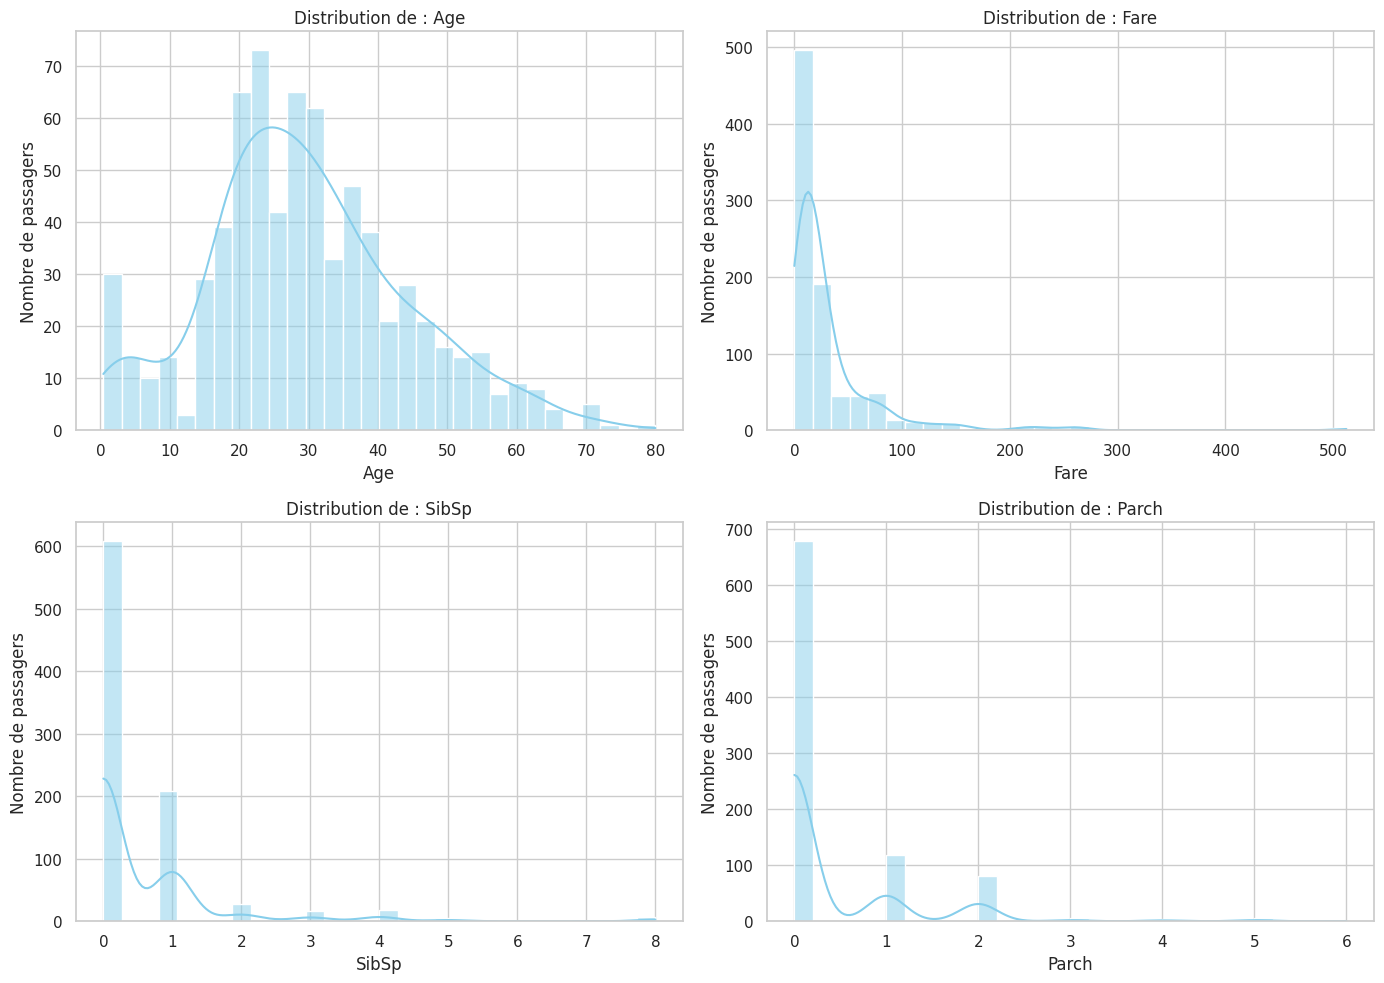

In [255]:
#pour le style
sns.set(style="whitegrid")

# Définissons les variables a visualiser
variablesatracer = ['Age', 'Fare', 'SibSp', 'Parch']

# Creons une figure avec 4 graphiques de 2 lignes et 2 colones.
plt.figure(figsize=(14, 10))

for i, variable in enumerate(variablesatracer):
    plt.subplot(2, 2, i + 1) # Position du graphique

    # Création de l'histogramme
    sns.histplot(donnees_apprentissage[variable].dropna(), kde=True, bins=30, color='skyblue')
    # .dropna() est mis pour ignorer les valeurs manquantes NaN dans 'Age'

    plt.title(f'Distribution de : {variable}')
    plt.xlabel(variable)
    plt.ylabel('Nombre de passagers')

# Ajustement automatique de l'espacement
plt.tight_layout()
plt.show()

 ## diagrammes de dispersion pour explorer les relations entre les caractéristiques et étudier la matrice de corrélation

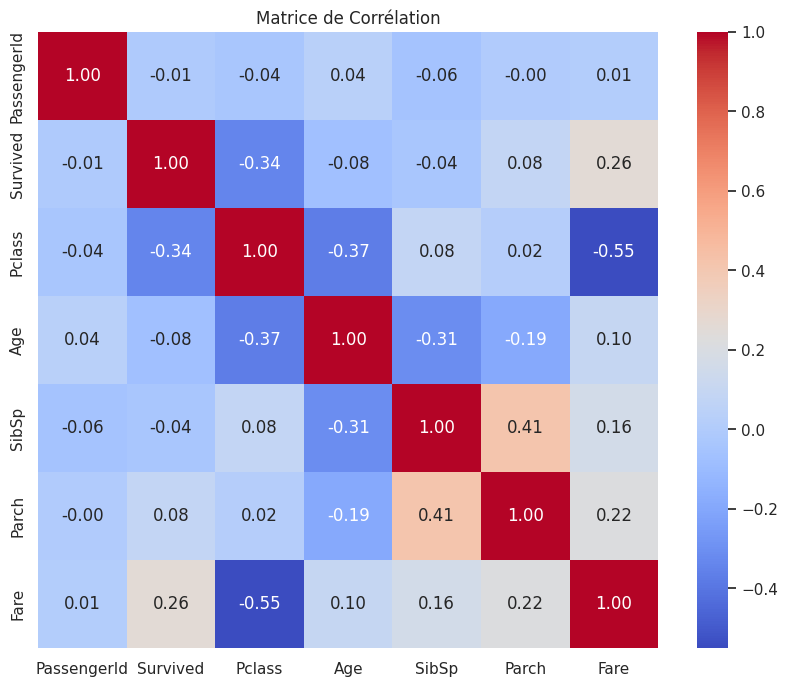

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matrice de corrélation
colonnes_numeriques = donnees_apprentissage.select_dtypes(include=['number'])
matrice_corr = colonnes_numeriques.corr()

# Affichage de la Heatmap (Carte de chaleur)
plt.figure(figsize=(10, 8))
# annot=True affiche les chiffres, cmap='coolwarm' met en rouge les fortes corrélations
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()


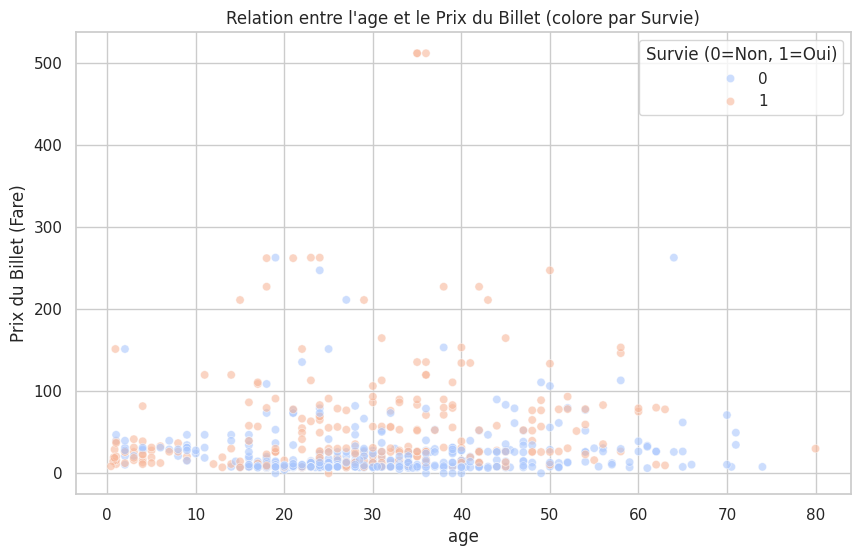

In [257]:
# Diagramme de dispersion (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=donnees_apprentissage, x='Age', y='Fare', hue='Survived', palette='coolwarm', alpha=0.6)

plt.title("Relation entre l'age et le Prix du Billet (colore par Survie)")
plt.xlabel("age")
plt.ylabel("Prix du Billet (Fare)")
plt.legend(title='Survie (0=Non, 1=Oui)')
plt.show()

### Etude des corrlations



sur le diagramme de correlation on observe que y a une correlation positive de 0.26 avec le prix du biellet et la survie. Ceux qui avaient des biellets plus cheres ont eut plus de chances de survie. ensuite on observe un correlation negative entre la classe Pclass et la survie. ce qui montre que ceux qui etait dans les classe dont le numero est plus bas comme classe 1 avaient plus de chances d'etres sauves.

### Identifions les classes de l'ensemble de données, verifiant si elles sont équilibrées ou pas.



Répartition des classes 
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


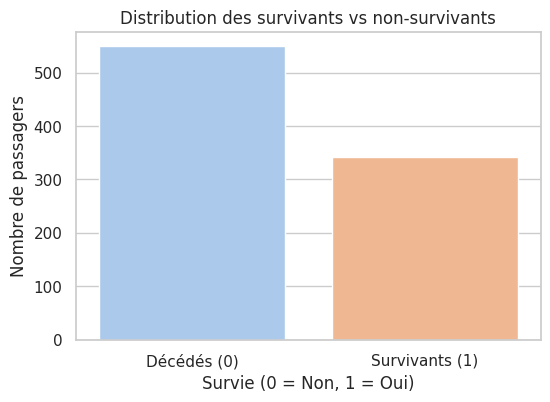

In [258]:
# Calcul des pourcentages exacts
# normalize=True permet d'obtenir la proportion (entre 0 et 1) au lieu du nombre brut
repartition = donnees_apprentissage['Survived'].value_counts(normalize=True) * 100

print("Répartition des classes ")
print(repartition)

# Visualisation graphique
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=donnees_apprentissage, hue='Survived', palette='pastel', legend=False)

plt.title("Distribution des survivants vs non-survivants")
plt.xlabel("Survie (0 = Non, 1 = Oui)")
plt.ylabel("Nombre de passagers")
# On change les étiquettes 0 et 1 pour que ce soit plus comprehensible
plt.xticks([0, 1], ['Décédés (0)', 'Survivants (1)'])

plt.show()

### Gestion des valeurs manquantes


In [259]:
from sklearn.preprocessing import LabelEncoder

#Identification des valeurs manquantes
print("Valeurs manquantes dans les donnees d'apprentissage")
print(donnees_apprentissage.isnull().sum())

# Creons une copie pour travailler sans modifier l'original
# donnees_nettoyees servira pour l'entraînement du modèle
donnees_nettoyees = donnees_apprentissage.copy()

Valeurs manquantes dans les donnees d'apprentissage
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [260]:
#Traitement des valeurs manquantes

# On a beaucoup de donnees manquantes pour l'age donc on va remplacer par la mediane
mediane_age = donnees_nettoyees['Age'].median()
donnees_nettoyees['Age'] = donnees_nettoyees['Age'].fillna(mediane_age)

# Pour l'embarquement il manque 2 valeurs, on remplace par la valeur la plus fréquente on va utiliser donc le Mode
mode_embarquement = donnees_nettoyees['Embarked'].mode()[0]
donnees_nettoyees['Embarked'] = donnees_nettoyees['Embarked'].fillna(mode_embarquement)

# Pour la Cabine il manque plus de 77/100 des données, c'est beaucoup de donnees manquantes. on laisse tomber cette collonne parce qu'on peut pas avoir des donnees fiales pour ca
donnees_nettoyees = donnees_nettoyees.drop('Cabin', axis=1)

# Suppression des identifiants inutiles pour la prédiction
donnees_nettoyees = donnees_nettoyees.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [261]:
#numerisons les variables textuelles en chiffres
encodeur = LabelEncoder()

# 0 ou 1 pour male et femelle
donnees_nettoyees['Sex'] = encodeur.fit_transform(donnees_nettoyees['Sex'])

# 0 pour S, 1 pour C, 2 pour Q
donnees_nettoyees['Embarked'] = encodeur.fit_transform(donnees_nettoyees['Embarked'])



In [262]:
# verifions nos donnees
print("\n valeurs manquantes apres nettoyage ")
print(donnees_nettoyees.isnull().sum())

print("\n aperçu des données prêtes")
display(donnees_nettoyees.head())


 valeurs manquantes apres nettoyage 
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

 aperçu des données prêtes


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## $apprentissage$ $avec$ $XGBoost$

### creaion du modele

avant de creer le modele separons nos donnees pour en mettant les caracteristiques dans x et le resultat dans y
ensuite separons le en donnee de test et d'entrainement  

In [263]:
# X contient toutes les caracteristiques commes l'age, Sexe, Prix, ...
X = donnees_nettoyees.drop('Survived', axis=1)

# y contient la réponse
y = donnees_nettoyees['Survived']



In [264]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Création d'un jeu de validation
# On garde 20% des données pour cette vérification.
X_entrainement, X_validation, y_entrainement, y_validation = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Creons maintenant le modele

In [265]:
# Instanciation du modèle XGBoost

modele_xgb = XGBClassifier(
    n_estimators=100,       # Nombre d'arbres de départ
    learning_rate=0.1,      # Vitesse d'apprentissage
    eval_metric='logloss',  # Métrique d'erreur (Log-Loss)
    random_state=42         # Pour avoir toujours le même résultat
)

In [266]:
# Définissons d'abord la Grille d'hyperparamètres à tester
parametres_a_tester = {
    'n_estimators': [50, 100, 200],      # Nombre d'arbres
    'learning_rate': [0.01, 0.1, 0.2],   # Vitesse d'apprentissage
    'max_depth': [3, 4, 5],              # Profondeur des arbres
    'subsample': [0.8, 1.0]              # Portion de données utilisée
}

In [267]:
# la stratégie K-Fold pour la Validation Croisée
strategie_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [268]:
# Configuration de l'entraînement intelligent (GridSearch)
recherche_grid = GridSearchCV(
    estimator=modele_xgb,           # Notre modèle vide
    param_grid=parametres_a_tester, # Les options à tester
    scoring='accuracy',             # Objectif : avoir le plus de réponses justes
    cv=strategie_kfold,             # Utilisation du K-Fold
    n_jobs=-1,                      # Utilise toute la puissance du PC
    verbose=1                       # Affiche la progression
)

In [269]:
# commencons l'entrainement
print("commencons l'entrainement")
recherche_grid.fit(X_entrainement, y_entrainement)

commencons l'entrainement
Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

### voyons les rsultats

In [270]:
# resultats trouves

print(f"Meilleurs paramètres trouvés : {recherche_grid.best_params_}")
print(f"Meilleure exactitude (Accuracy) moyenne : {recherche_grid.best_score_:.4f}")

Meilleurs paramètres trouvés : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Meilleure exactitude (Accuracy) moyenne : 0.8273


In [271]:
# sauvegardons le meilleur modèle dans une variable
meilleur_modele = recherche_grid.best_estimator_

## Verifions les resultats et interpretons

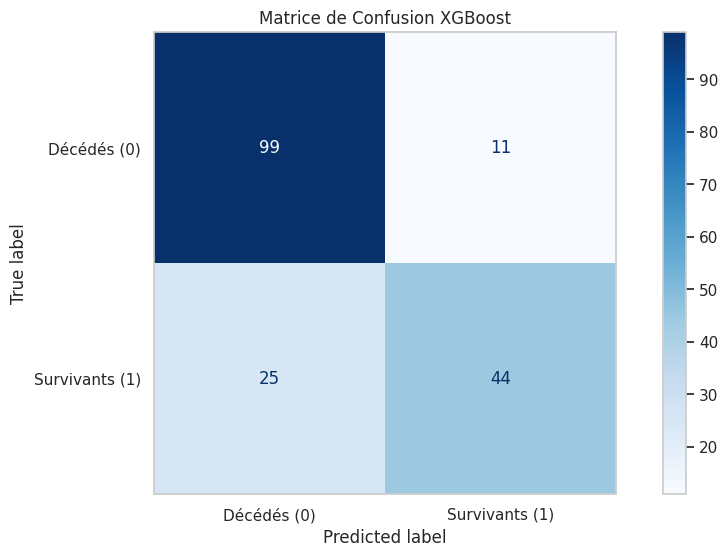

In [272]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = meilleur_modele.predict(X_validation)

# Calcul de la matrice
# comparation des Vraies réponses y_validation aux Prédictions y_pred
matrice = confusion_matrix(y_validation, y_pred)

# Affichage graphique
disp = ConfusionMatrixDisplay(confusion_matrix=matrice, display_labels=["Décédés (0)", "Survivants (1)"])
disp.plot(cmap='Blues')

plt.title("Matrice de Confusion XGBoost")
plt.grid(False) # On enlève le quadrillage pour que ce soit plus joli
plt.show()

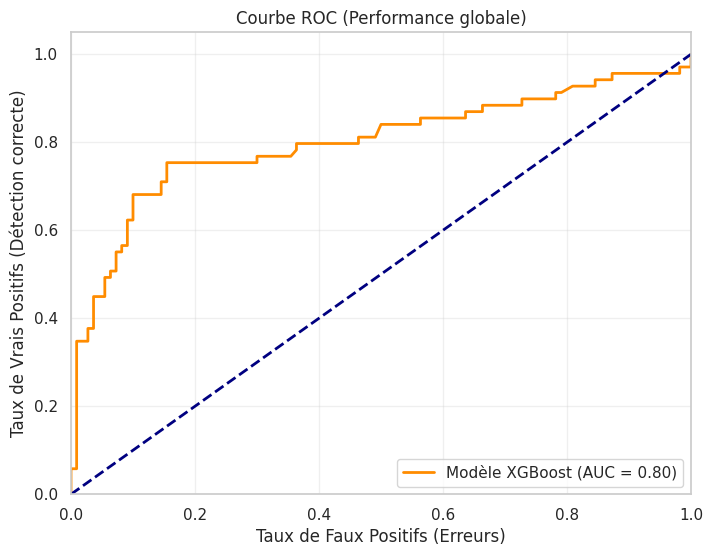

In [273]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcul des probabilités
# Pour la courbe ROC, on a besoin de la probabilité d'être survivant (pas juste 0 ou 1)
# [:, 1] signifie qu'on prend la probabilité de la classe 1 (Survivant)
probs_survie = meilleur_modele.predict_proba(X_validation)[:, 1]

# Calcul des métriques ROC
fpr, tpr, thresholds = roc_curve(y_validation, probs_survie)
roc_auc = auc(fpr, tpr) # Calcul de l'aire sous la courbe (La note sur 1)

# Tracé du graphique
plt.figure(figsize=(8, 6))

# La courbe du modèle (en orange)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Modèle XGBoost (AUC = {roc_auc:.2f})')

# La ligne du hasard (en bleu pointillé) - correspond à pile ou face
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Mise en page
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (Erreurs)')
plt.ylabel('Taux de Vrais Positifs (Détection correcte)')
plt.title('Courbe ROC (Performance globale)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

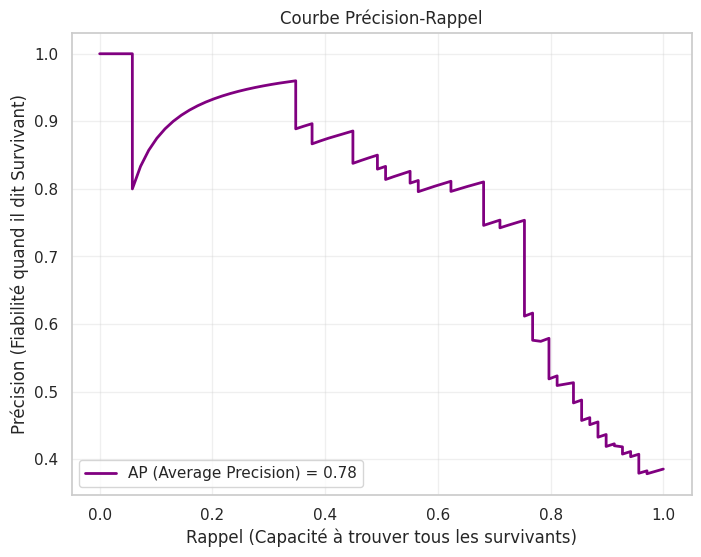

In [274]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calcul des scores
precision, recall, _ = precision_recall_curve(y_validation, probs_survie)
avg_precision = average_precision_score(y_validation, probs_survie)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'AP (Average Precision) = {avg_precision:.2f}')

# Mise en page
plt.xlabel('Rappel (Capacité à trouver tous les survivants)')
plt.ylabel('Précision (Fiabilité quand il dit Survivant)')
plt.title('Courbe Précision-Rappel')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.show()

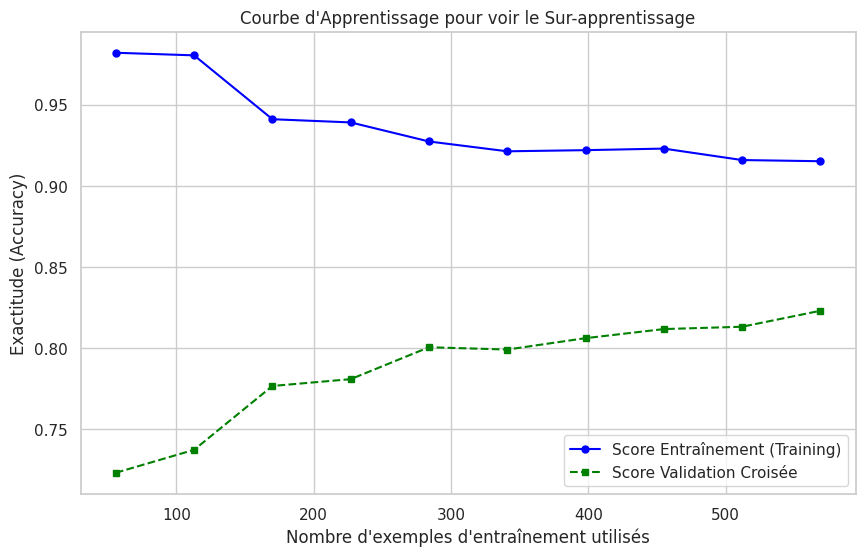

In [275]:
from sklearn.model_selection import learning_curve
import numpy as np

# Calcul des performances pour différentes tailles de jeu d'entraînement
# Cela permet de voir les erreurs d'apprentissage contre les erreurs de validation croisée
train_sizes, train_scores, test_scores = learning_curve(
    estimator=meilleur_modele,
    X=X_entrainement,
    y=y_entrainement,
    cv=5,                # 5 validations croisées à chaque étape
    n_jobs=-1,           # Utilise tous les coeurs
    train_sizes=np.linspace(0.1, 1.0, 10), # On teste de 10% à 100% des données
    scoring='accuracy'
)

# Calcul des moyennes et écarts-types (pour lisser les courbes)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))

# Courbe d'entraînement
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Score Entraînement (Training)')

# Courbe de validation : erreurs de validations croisé
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Score Validation Croisée')

plt.title("Courbe d'Apprentissage pour voir le Sur-apprentissage")
plt.xlabel("Nombre d'exemples d'entraînement utilisés")
plt.ylabel("Exactitude (Accuracy)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### matrice de confusion
sur la matrice de confusion on a un resultat de 143 predictions sur 179, on peut dire que le modele est pas mal performant. Mais aussi on a deux fois plus de faux negatifs que de faux positifs ( 25 et 11). donc il prédit la mort pour des personnes qui ont en réalité survécu, alors qu'il se trompe rarement quand il prédit un décès.
### Sur la courbe ROC
on a un score de 0.8, le modele est performant comme avec la matrice. La courbe progresse vite dans vers le haut au debut, ce qui montre qu'il detecte bien les survivants par les vrais positifs, aussi on a un taux d'erreur bas. ce modele est fiable vu qu'il est different du hasard, c'est t'a dire un score > a 0.5.
### courbe des precisions rappel
cette courbe est iportante vu que nos classes sont déséquilibrées par ce qu'on plus de décès. On a un score moyen de 0.78 qui est solide. Le graphique montre que le modèle est très fiable lorsqu'il est sûr de lui sur la partie gauche. par contre a droite on remarque la precision chutte rapidement. Ce qui montre qu'il repère très bien les cas évidents mais a plus de mal à identifier les survivants avec un profil un peu different.
### courbe d'apprentissage
La courbe de validation est en croissance constante montrant que le modele generalise bien avec l'ajout de données. il y a un ecart assez grand entre les deux courbes laissant croire que le modele surapprends avec les donnees d'entrainement.

## SOURCE POUR LA PRATIQUE

https://www.digitalocean.com/community/tutorials/how-to-build-a-machine-learning-classifier-in-python-with-scikit-learn

https://www.tensorflow.org/tutorials?hl=fr

Gemini pour les erreurs et plus de compréhension du code (AZIZ)

# Partie pratique random forest

## Imports necessaire

In [276]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_curve, auc,
                             precision_recall_curve, roc_auc_score)
from sklearn.model_selection import learning_curve, validation_curve



## Chargement des datasets

In [277]:

train_df = pd.read_csv("/titanic/train.csv")
test_df = pd.read_csv('/titanic/test.csv')
submission_df = pd.read_csv('/titanic/gender_submission.csv')

print("Dataset d'entraînement :", train_df.shape)
print("Dataset de test :", test_df.shape)
print("Fichier de soumission :", submission_df.shape)

print("\nAperçu du dataset d'entraînement :")
display(train_df.head(10))

print("\nAperçu du dataset de test :")
display(test_df.head(5))

Dataset d'entraînement : (891, 12)
Dataset de test : (418, 11)
Fichier de soumission : (418, 2)

Aperçu du dataset d'entraînement :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C



Aperçu du dataset de test :


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploration des données - Informations générales


In [278]:
print("Informations sur le dataset d'entraînement")
print(train_df.info())

print("\nStatistiques descriptives")
display(train_df.describe())

print("\nValeurs manquantes dans train")
missing_train = train_df.isnull().sum()
missing_train = missing_train[missing_train > 0]
print(missing_train)

print("\nValeurs manquantes dans test")
missing_test = test_df.isnull().sum()
missing_test = missing_test[missing_test > 0]
print(missing_test)

print("\nDistribution de la variable cible (Survived)")
print(train_df['Survived'].value_counts())
print(f"Taux de survie : {train_df['Survived'].mean():.2%}")

Informations sur le dataset d'entraînement
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Statistiques descriptives


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Valeurs manquantes dans train
Age         177
Cabin       687
Embarked      2
dtype: int64

Valeurs manquantes dans test
Age       86
Fare       1
Cabin    327
dtype: int64

Distribution de la variable cible (Survived)
Survived
0    549
1    342
Name: count, dtype: int64
Taux de survie : 38.38%


## Visualisations exploratoires

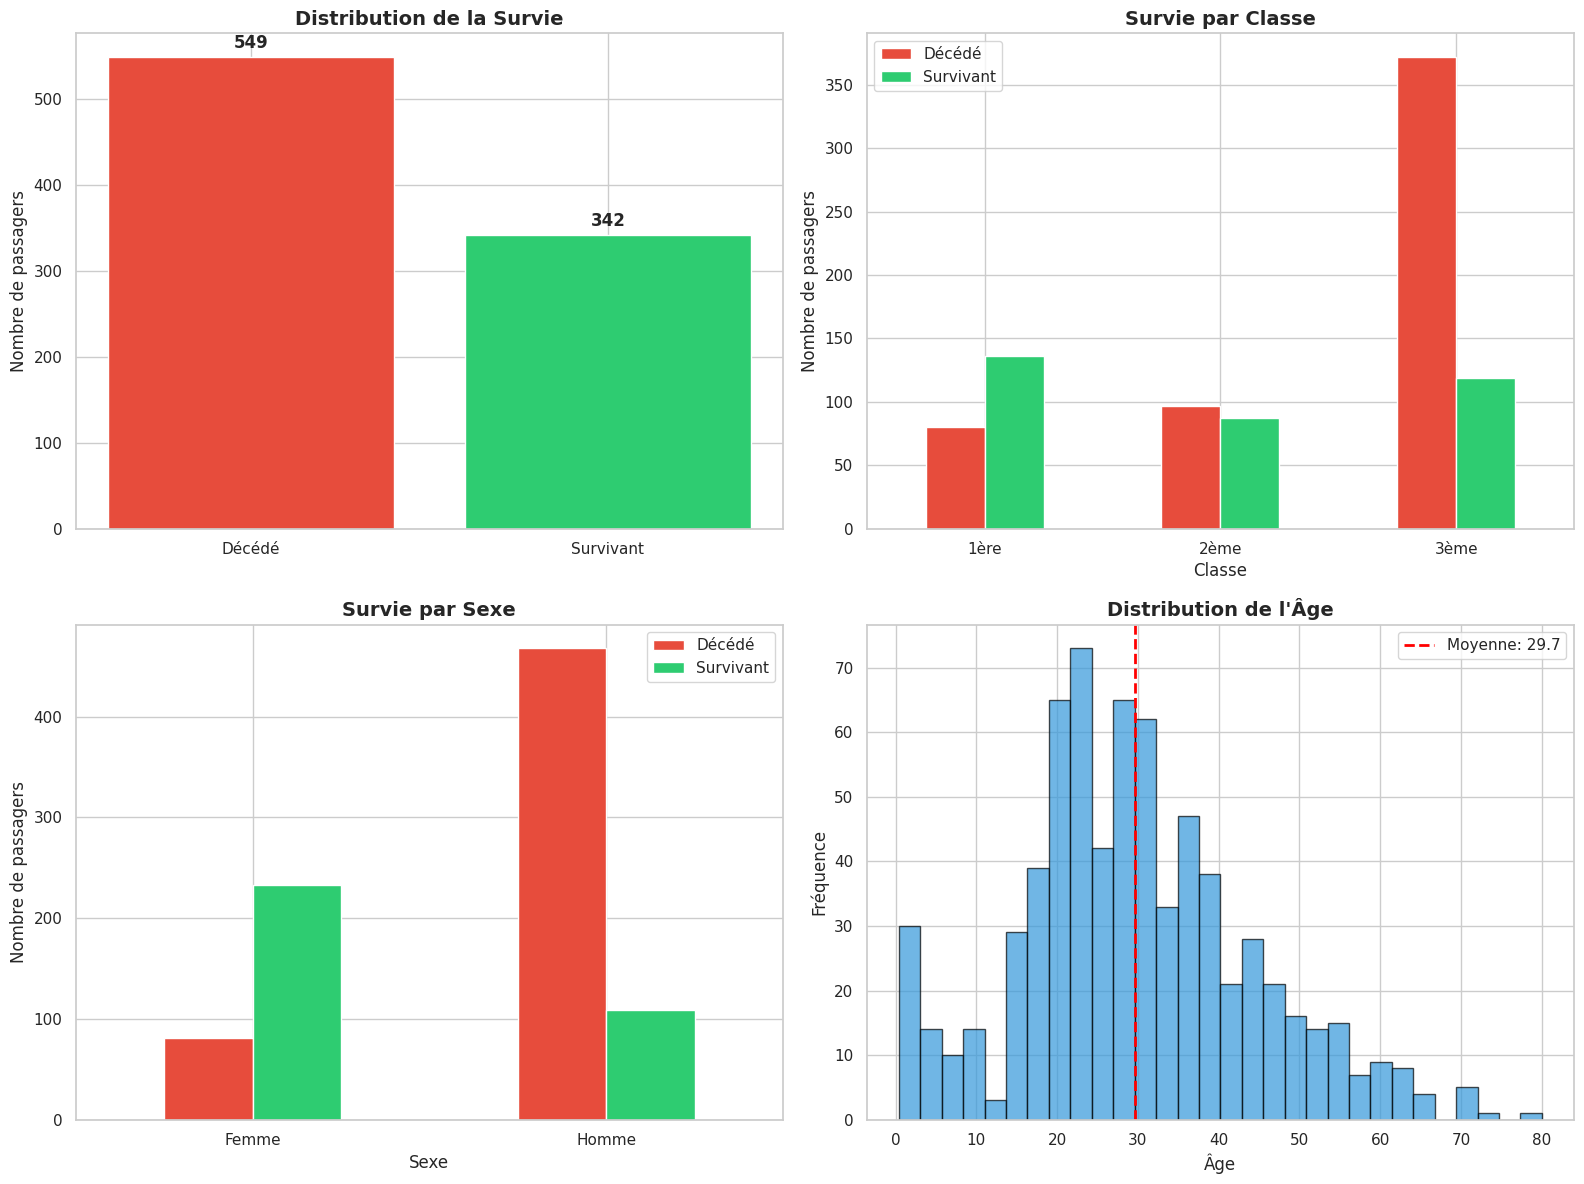

In [279]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

survival_counts = train_df['Survived'].value_counts()
axes[0, 0].bar(['Décédé', 'Survivant'], survival_counts.values, color=['#e74c3c', '#2ecc71'])
axes[0, 0].set_title('Distribution de la Survie', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Nombre de passagers')
for i, v in enumerate(survival_counts.values):
    axes[0, 0].text(i, v + 10, str(v), ha='center', fontweight='bold')

survival_by_class = pd.crosstab(train_df['Pclass'], train_df['Survived'])
survival_by_class.plot(kind='bar', ax=axes[0, 1], color=['#e74c3c', '#2ecc71'])
axes[0, 1].set_title('Survie par Classe', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Classe')
axes[0, 1].set_ylabel('Nombre de passagers')
axes[0, 1].legend(['Décédé', 'Survivant'])
axes[0, 1].set_xticklabels(['1ère', '2ème', '3ème'], rotation=0)

survival_by_sex = pd.crosstab(train_df['Sex'], train_df['Survived'])
survival_by_sex.plot(kind='bar', ax=axes[1, 0], color=['#e74c3c', '#2ecc71'])
axes[1, 0].set_title('Survie par Sexe', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Sexe')
axes[1, 0].set_ylabel('Nombre de passagers')
axes[1, 0].legend(['Décédé', 'Survivant'])
axes[1, 0].set_xticklabels(['Femme', 'Homme'], rotation=0)

axes[1, 1].hist(train_df['Age'].dropna(), bins=30, color='#3498db', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribution de l\'Âge', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Âge')
axes[1, 1].set_ylabel('Fréquence')
axes[1, 1].axvline(train_df['Age'].mean(), color='red', linestyle='--', linewidth=2,
                    label=f'Moyenne: {train_df["Age"].mean():.1f}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## Matrice de corrélation

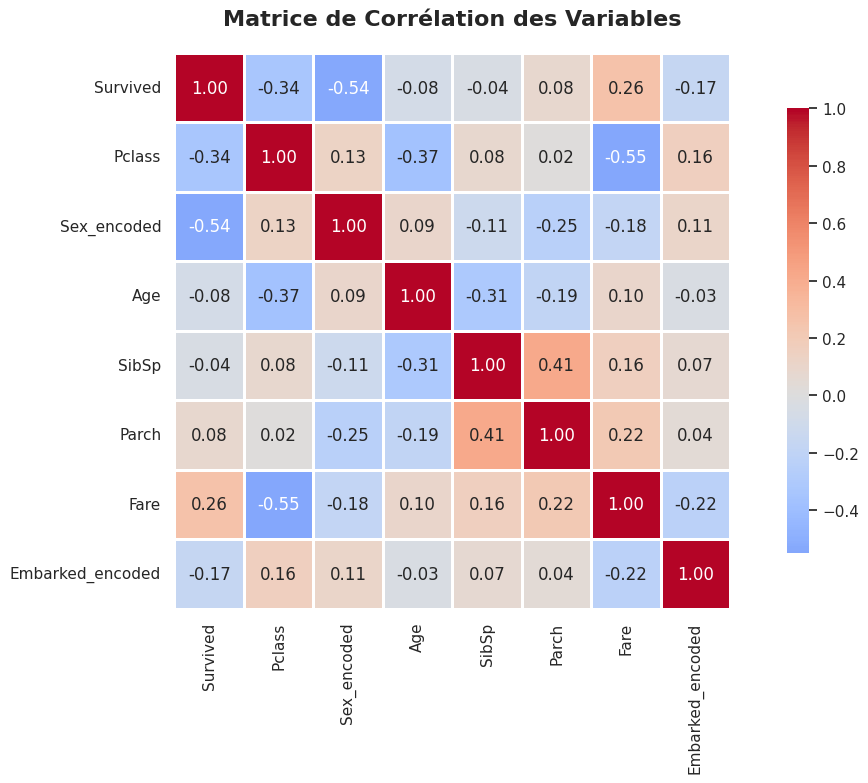


Corrélations avec la variable cible Survived
Survived            1.000000
Fare                0.257307
Parch               0.081629
SibSp              -0.035322
Age                -0.077221
Embarked_encoded   -0.167675
Pclass             -0.338481
Sex_encoded        -0.543351
Name: Survived, dtype: float64


In [280]:
df_corr = train_df.copy()

le = LabelEncoder()
df_corr['Sex_encoded'] = le.fit_transform(df_corr['Sex'])
df_corr['Embarked_encoded'] = le.fit_transform(df_corr['Embarked'].fillna('S'))

cols_for_corr = ['Survived', 'Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_encoded']
correlation_matrix = df_corr[cols_for_corr].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation des Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nCorrélations avec la variable cible Survived")
correlations_with_target = correlation_matrix['Survived'].sort_values(ascending=False)
print(correlations_with_target)

## Fonction de prétraitement


In [281]:
def preprocess_data(df, is_train=True):
    df_processed = df.copy()

    # Imputation de l'âge par la médiane selon Pclass et Sex
    df_processed['Age'] = df_processed.groupby(['Pclass', 'Sex'])['Age'].transform(
        lambda x: x.fillna(x.median())
    )

    # Imputation de Embarked par le mode
    if df_processed['Embarked'].isnull().any():
        df_processed['Embarked'].fillna(df_processed['Embarked'].mode()[0], inplace=True)

    # Imputation de Fare par la médiane
    if df_processed['Fare'].isnull().any():
        df_processed['Fare'].fillna(df_processed['Fare'].median(), inplace=True)

    # Création de nouvelles features
    df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1
    df_processed['IsAlone'] = (df_processed['FamilySize'] == 1).astype(int)

    df_processed['AgeGroup'] = pd.cut(df_processed['Age'],
                                       bins=[0, 12, 18, 35, 60, 100],
                                       labels=['Enfant', 'Adolescent', 'Jeune_adulte', 'Adulte', 'Senior'])

    df_processed['FareGroup'] = pd.qcut(df_processed['Fare'], q=4, duplicates='drop',
                                         labels=['Bas', 'Moyen_Bas', 'Moyen_Haut', 'Haut'])

    df_processed['Title'] = df_processed['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

    title_mapping = {
        'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
        'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
        'Mlle': 'Miss', 'Countess': 'Rare', 'Ms': 'Miss', 'Lady': 'Rare',
        'Jonkheer': 'Rare', 'Don': 'Rare', 'Dona': 'Rare', 'Mme': 'Mrs',
        'Capt': 'Rare', 'Sir': 'Rare'
    }
    df_processed['Title'] = df_processed['Title'].map(title_mapping)
    df_processed['Title'].fillna('Rare', inplace=True)

    return df_processed

print("Fonction de prétraitement créée")

Fonction de prétraitement créée


## Application du prétraitement

In [282]:
train_processed = preprocess_data(train_df, is_train=True)
test_processed = preprocess_data(test_df, is_train=False)

print("Prétraitement appliqué")
print("Train shape:", train_processed.shape)
print("Test shape:", test_processed.shape)

print("\nValeurs manquantes après prétraitement (train)")
print(train_processed.isnull().sum().sum())

print("\nValeurs manquantes après prétraitement (test)")
print(test_processed.isnull().sum().sum())

print("\nNouvelles features créées:")
print("- FamilySize")
print("- IsAlone")
print("- AgeGroup")
print("- FareGroup")
print("- Title")

Prétraitement appliqué
Train shape: (891, 17)
Test shape: (418, 16)

Valeurs manquantes après prétraitement (train)
687

Valeurs manquantes après prétraitement (test)
327

Nouvelles features créées:
- FamilySize
- IsAlone
- AgeGroup
- FareGroup
- Title


## Encodage des variables catégorielles

In [283]:
categorical_features = ['Sex', 'Embarked', 'Title', 'AgeGroup', 'FareGroup']

train_encoded = pd.get_dummies(train_processed, columns=categorical_features, drop_first=True)
test_encoded = pd.get_dummies(test_processed, columns=categorical_features, drop_first=True)

train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

print("Encodage terminé")
print("Train shape:", train_encoded.shape)
print("Test shape:", test_encoded.shape)

print("\nColonnes après encodage:")
print(train_encoded.columns.tolist())

Encodage terminé
Train shape: (891, 26)
Test shape: (418, 26)

Colonnes après encodage:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'FamilySize', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'AgeGroup_Adolescent', 'AgeGroup_Jeune_adulte', 'AgeGroup_Adulte', 'AgeGroup_Senior', 'FareGroup_Moyen_Bas', 'FareGroup_Moyen_Haut', 'FareGroup_Haut']


## Préparation des données pour le modèle

In [284]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

train_model = train_encoded.drop(columns=columns_to_drop, errors='ignore')
test_model = test_encoded.drop(columns=columns_to_drop, errors='ignore')

X = train_model.drop('Survived', axis=1)
y = train_model['Survived']

X_test_final = test_model.drop('Survived', axis=1, errors='ignore')

print("Features finales:", X.shape[1])
print("Exemples d'entraînement:", X.shape[0])
print("Exemples de test:", X_test_final.shape[0])

print("\nDistribution de la variable cible")
print("Classe 0:", (y == 0).sum())
print("Classe 1:", (y == 1).sum())

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTaille ensemble d'entraînement:", X_train.shape[0])
print("Taille ensemble de validation:", X_val.shape[0])

Features finales: 21
Exemples d'entraînement: 891
Exemples de test: 418

Distribution de la variable cible
Classe 0: 549
Classe 1: 342

Taille ensemble d'entraînement: 712
Taille ensemble de validation: 179


## Modèle Random Forest de base

In [285]:
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_base.fit(X_train, y_train)

y_pred_train = rf_base.predict(X_train)
y_pred_val = rf_base.predict(X_val)

print("Modèle de base entraîné")
print("\nPerformance sur l'ensemble d'entraînement")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")

print("\nPerformance sur l'ensemble de validation")
print(f"Accuracy: {accuracy_score(y_val, y_pred_val):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_val):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_val):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_val):.4f}")

print("\nRapport de classification")
print(classification_report(y_val, y_pred_val, target_names=['Décédé', 'Survivant']))

Modèle de base entraîné

Performance sur l'ensemble d'entraînement
Accuracy: 0.9846

Performance sur l'ensemble de validation
Accuracy: 0.7989
Precision: 0.7538
Recall: 0.7101
F1-Score: 0.7313

Rapport de classification
              precision    recall  f1-score   support

      Décédé       0.82      0.85      0.84       110
   Survivant       0.75      0.71      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



## K-Fold Cross-Validation


Scores de cross-validation
Fold 1: 0.8112
Fold 2: 0.7902
Fold 3: 0.8239
Fold 4: 0.8239
Fold 5: 0.8099

Accuracy moyenne: 0.8118
Écart-type: 0.0124


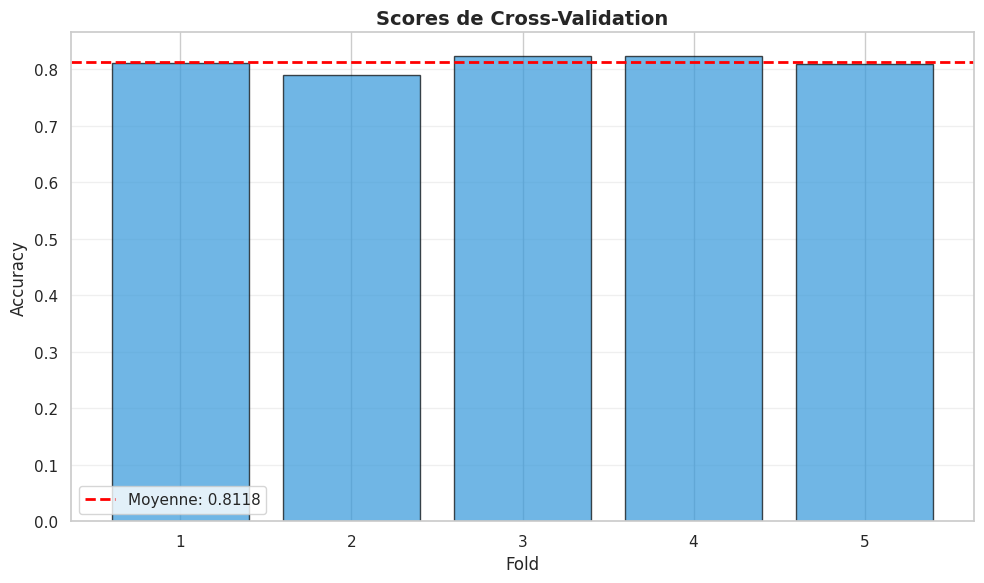

In [286]:
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

cv_scores = cross_val_score(rf_base, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1)

print("Scores de cross-validation")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nAccuracy moyenne: {cv_scores.mean():.4f}")
print(f"Écart-type: {cv_scores.std():.4f}")

plt.figure(figsize=(10, 6))
plt.bar(range(1, k+1), cv_scores, color='#3498db', edgecolor='black', alpha=0.7)
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', linewidth=2,
            label=f'Moyenne: {cv_scores.mean():.4f}')
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Scores de Cross-Validation', fontsize=14, fontweight='bold')
plt.xticks(range(1, k+1))
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## GridSearchCV

In [287]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

print("Grille d'hyperparamètres définie")
print("Nombre de combinaisons:", np.prod([len(v) for v in param_grid.values()]))

rf_grid = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf_grid,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

print("\nRecherche des meilleurs hyperparamètres...")
grid_search.fit(X_train, y_train)

print("\nMeilleurs hyperparamètres")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

print(f"\nMeilleur score de cross-validation: {grid_search.best_score_:.4f}")

Grille d'hyperparamètres définie
Nombre de combinaisons: 432

Recherche des meilleurs hyperparamètres...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits

Meilleurs hyperparamètres
bootstrap: True
max_depth: 20
max_features: sqrt
min_samples_leaf: 1
min_samples_split: 5
n_estimators: 100

Meilleur score de cross-validation: 0.8245


## Évaluation du modèle optimisé

In [288]:
best_rf = grid_search.best_estimator_

y_pred_train_opt = best_rf.predict(X_train)
y_pred_val_opt = best_rf.predict(X_val)
y_pred_proba_val = best_rf.predict_proba(X_val)[:, 1]

print("Performance sur l'ensemble d'entraînement")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train_opt):.4f}")

print("\nPerformance sur l'ensemble de validation")
print(f"Accuracy: {accuracy_score(y_val, y_pred_val_opt):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_val_opt):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_val_opt):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_val_opt):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_val, y_pred_proba_val):.4f}")

print("\nRapport de classification détaillé")
print(classification_report(y_val, y_pred_val_opt, target_names=['Décédé', 'Survivant']))

print("\nComparaison Modèle de base vs Modèle optimisé")
print(f"Base - Accuracy: {accuracy_score(y_val, y_pred_val):.4f}")
print(f"Optimisé - Accuracy: {accuracy_score(y_val, y_pred_val_opt):.4f}")
print(f"Amélioration: {(accuracy_score(y_val, y_pred_val_opt) - accuracy_score(y_val, y_pred_val)):.4f}")

Performance sur l'ensemble d'entraînement
Accuracy: 0.9256

Performance sur l'ensemble de validation
Accuracy: 0.8156
Precision: 0.7903
Recall: 0.7101
F1-Score: 0.7481
ROC-AUC: 0.8284

Rapport de classification détaillé
              precision    recall  f1-score   support

      Décédé       0.83      0.88      0.85       110
   Survivant       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179


Comparaison Modèle de base vs Modèle optimisé
Base - Accuracy: 0.7989
Optimisé - Accuracy: 0.8156
Amélioration: 0.0168


## Matrice de confusion

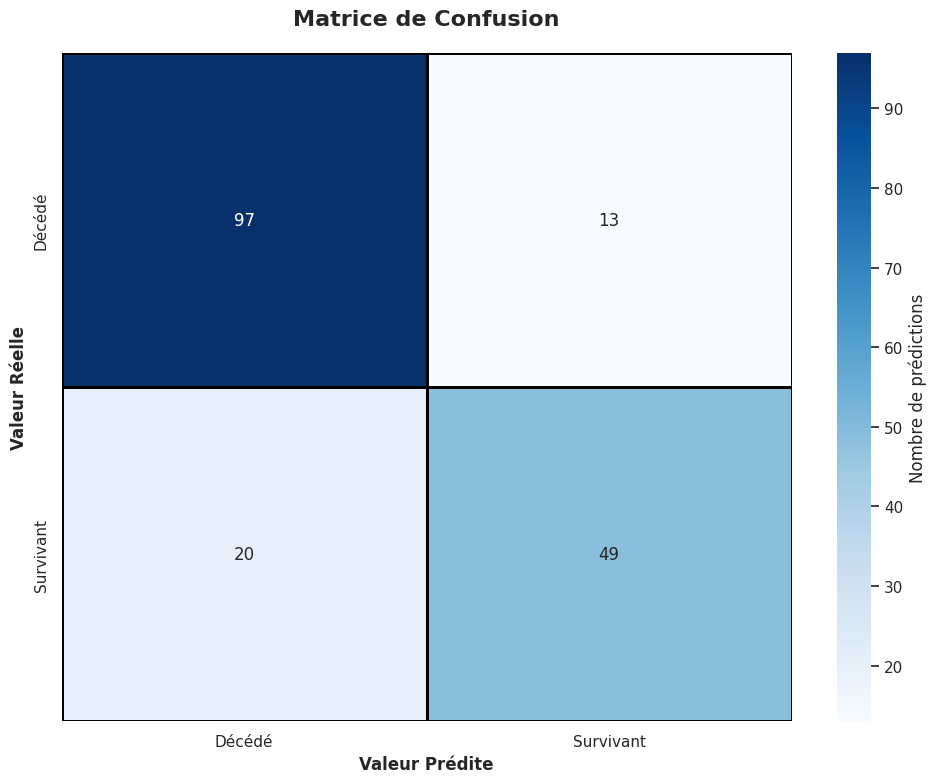

Analyse de la matrice de confusion
Vrais Négatifs (TN): 97
Faux Positifs (FP): 13
Faux Négatifs (FN): 20
Vrais Positifs (TP): 49

Taux de vrais positifs (Sensibilité): 0.7101
Taux de vrais négatifs (Spécificité): 0.8818


In [289]:
cm = confusion_matrix(y_val, y_pred_val_opt)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Décédé', 'Survivant'],
            yticklabels=['Décédé', 'Survivant'],
            cbar_kws={'label': 'Nombre de prédictions'},
            linewidths=2, linecolor='black')
plt.title('Matrice de Confusion', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Valeur Réelle', fontsize=12, fontweight='bold')
plt.xlabel('Valeur Prédite', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm.ravel()

print("Analyse de la matrice de confusion")
print(f"Vrais Négatifs (TN): {tn}")
print(f"Faux Positifs (FP): {fp}")
print(f"Faux Négatifs (FN): {fn}")
print(f"Vrais Positifs (TP): {tp}")
print(f"\nTaux de vrais positifs (Sensibilité): {tp/(tp+fn):.4f}")
print(f"Taux de vrais négatifs (Spécificité): {tn/(tn+fp):.4f}")

## Courbe ROC


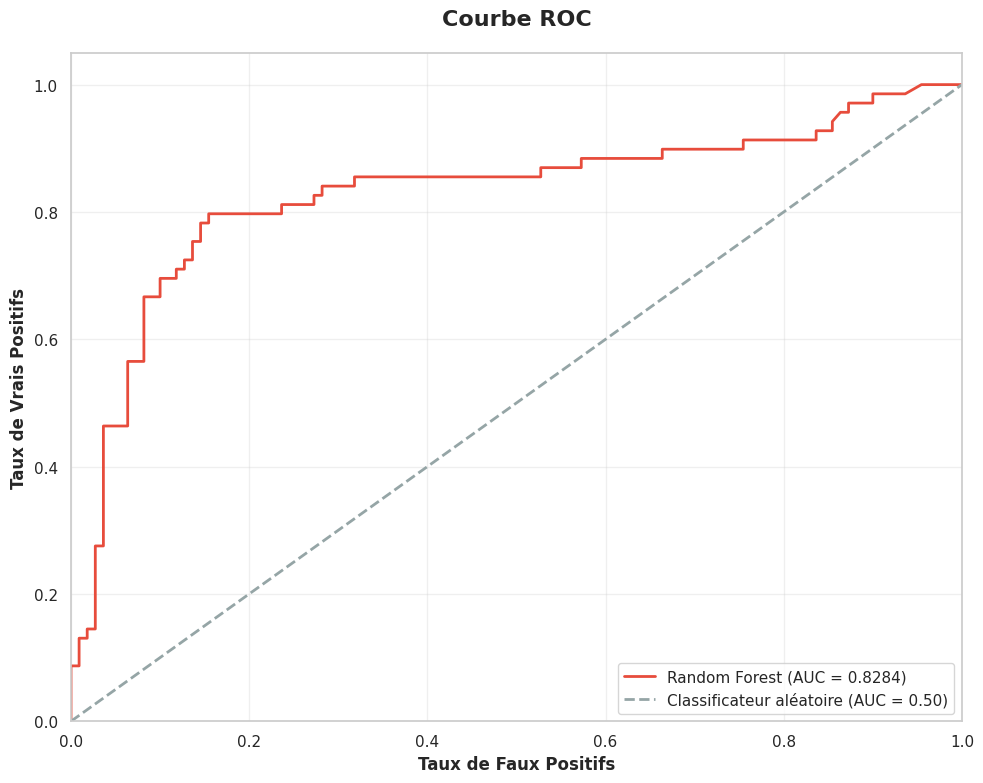

AUC-ROC Score: 0.8284


In [290]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_val)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='#e74c3c', lw=2, label=f'Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='#95a5a6', lw=2, linestyle='--', label='Classificateur aléatoire (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs', fontsize=12, fontweight='bold')
plt.ylabel('Taux de Vrais Positifs', fontsize=12, fontweight='bold')
plt.title('Courbe ROC', fontsize=16, fontweight='bold', pad=20)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"AUC-ROC Score: {roc_auc:.4f}")

## Courbe Precision-Recall


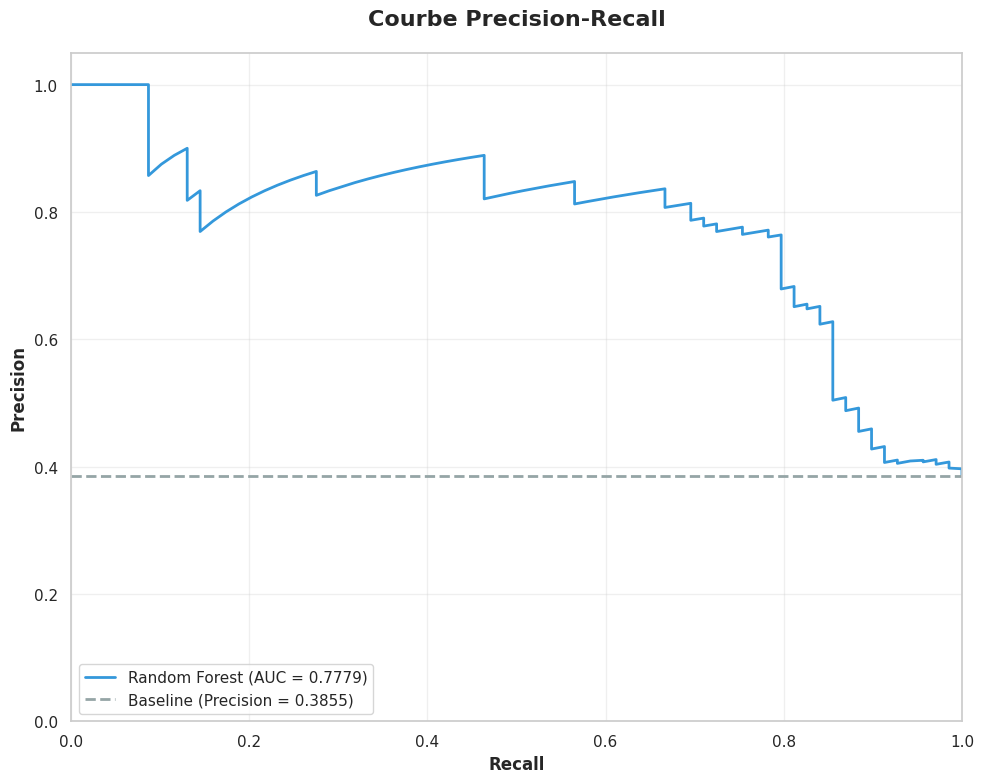

AUC Precision-Recall: 0.7779


In [291]:
precision, recall, thresholds_pr = precision_recall_curve(y_val, y_pred_proba_val)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='#3498db', lw=2, label=f'Random Forest (AUC = {pr_auc:.4f})')
plt.axhline(y=y_val.mean(), color='#95a5a6', linestyle='--', lw=2, label=f'Baseline (Precision = {y_val.mean():.4f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=12, fontweight='bold')
plt.ylabel('Precision', fontsize=12, fontweight='bold')
plt.title('Courbe Precision-Recall', fontsize=16, fontweight='bold', pad=20)
plt.legend(loc='lower left', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"AUC Precision-Recall: {pr_auc:.4f}")

## Courbes d'apprentissage

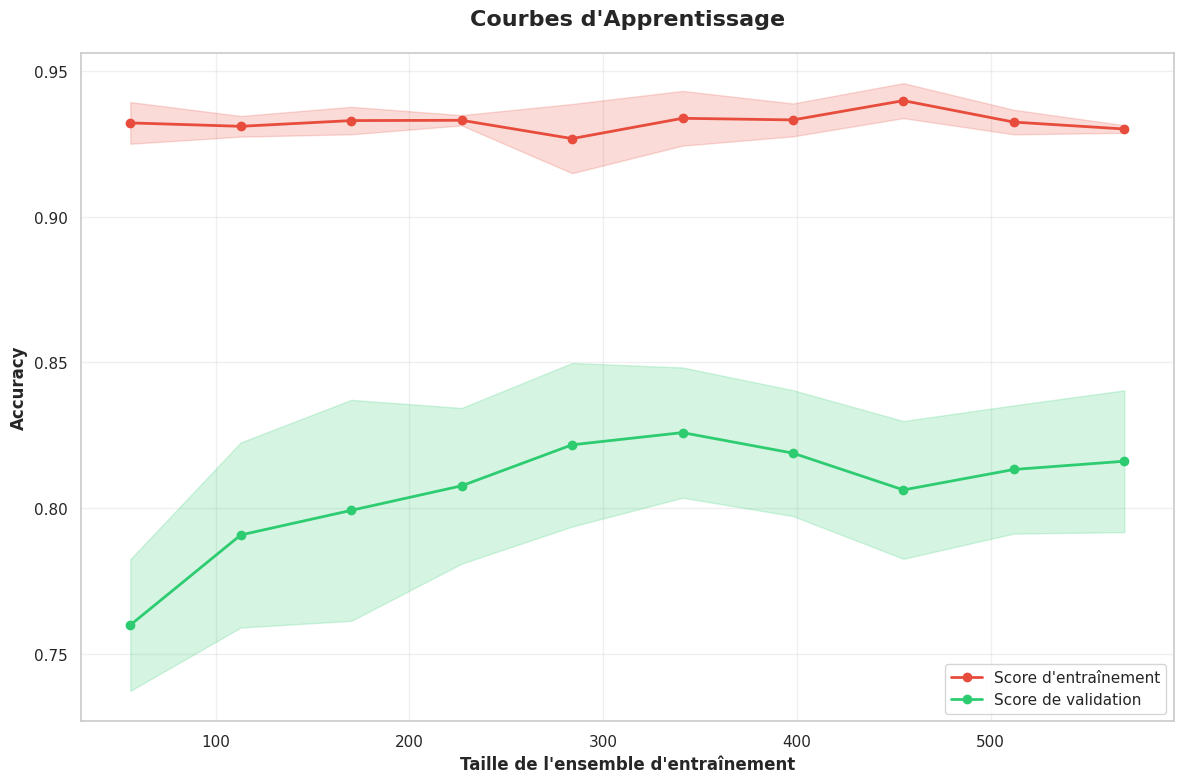

Score final d'entraînement: 0.9301 ± 0.0013
Score final de validation: 0.8161 ± 0.0243
Écart: 0.1140


In [292]:
train_sizes, train_scores, val_scores = learning_curve(
    best_rf, X_train, y_train,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_mean, 'o-', color='#e74c3c', label='Score d\'entraînement', linewidth=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='#e74c3c')
plt.plot(train_sizes, val_mean, 'o-', color='#2ecc71', label='Score de validation', linewidth=2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='#2ecc71')
plt.xlabel('Taille de l\'ensemble d\'entraînement', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Courbes d\'Apprentissage', fontsize=16, fontweight='bold', pad=20)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Score final d'entraînement: {train_mean[-1]:.4f} ± {train_std[-1]:.4f}")
print(f"Score final de validation: {val_mean[-1]:.4f} ± {val_std[-1]:.4f}")
print(f"Écart: {(train_mean[-1] - val_mean[-1]):.4f}")

# Partie Pratique Apprentissage Profonde

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import time
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


## chargement des donnees

In [ ]:
df = pd.read_csv('/titanic/train.csv')

## Presentation et Preprocessing

### Presentation

In [295]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [296]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [297]:
print(f"Le Nombre de lignes et de colonnes : {df.shape}")

Le Nombre de lignes et de colonnes : (891, 12)


In [298]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


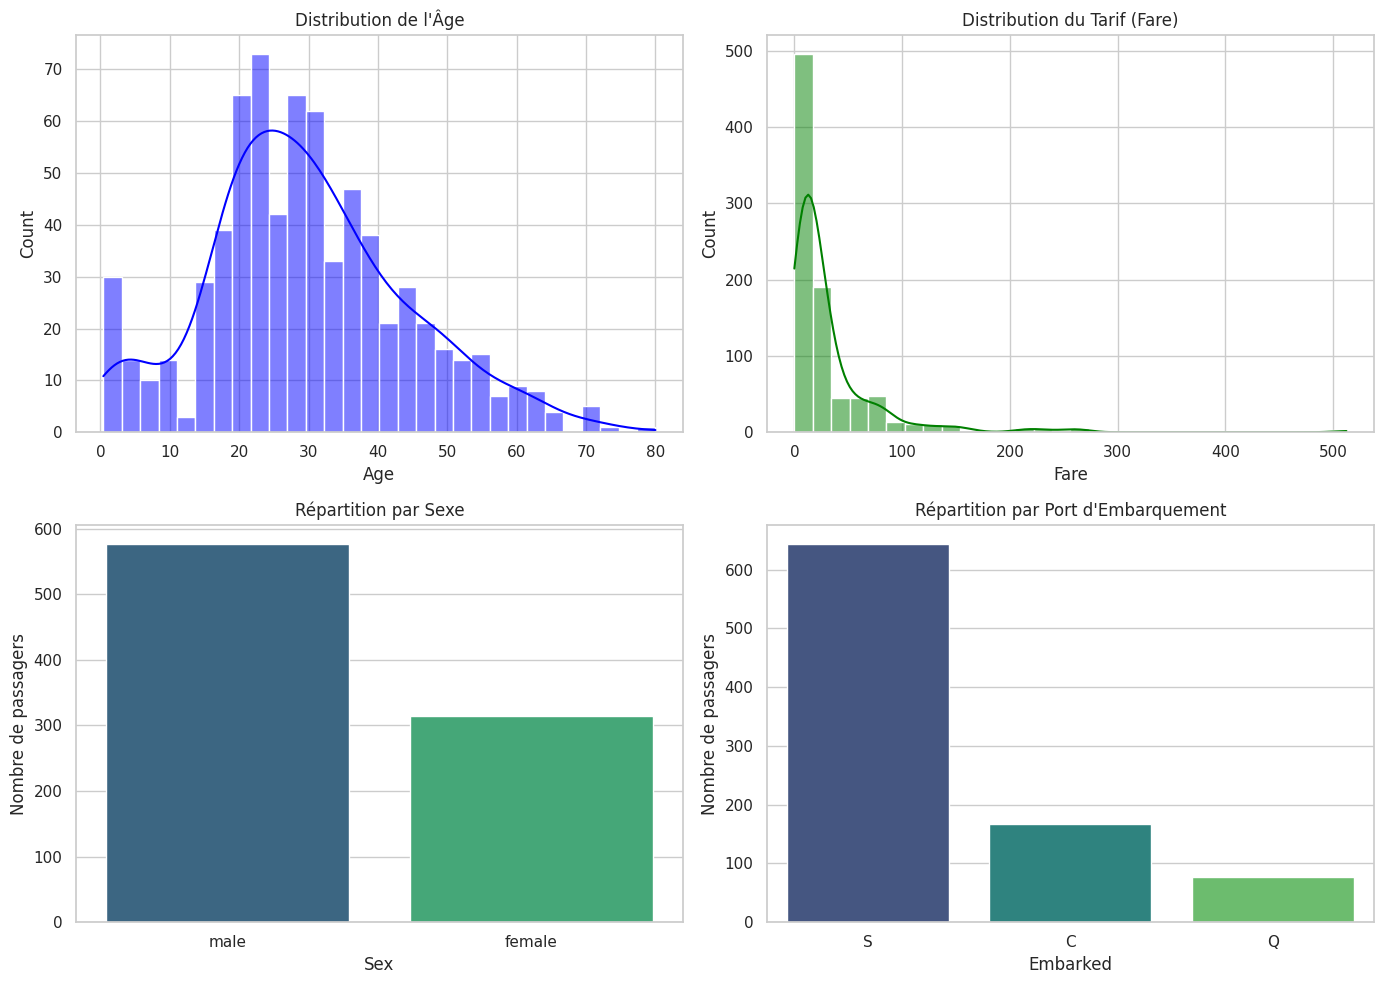

In [299]:
plt.figure(figsize=(14, 10))


plt.subplot(2, 2, 1)
sns.histplot(df['Age'].dropna(), kde=True, bins=30, color='blue')
plt.title('Distribution de l\'Âge')


plt.subplot(2, 2, 2)
sns.histplot(df['Fare'], kde=True, bins=30, color='green')
plt.title('Distribution du Tarif (Fare)')


plt.subplot(2, 2, 3)
sns.countplot(x='Sex', data=df, palette='viridis')
plt.title('Répartition par Sexe')
plt.ylabel('Nombre de passagers')


plt.subplot(2, 2, 4)
sns.countplot(x='Embarked', data=df, palette='viridis')
plt.title('Répartition par Port d\'Embarquement')
plt.ylabel('Nombre de passagers')

plt.tight_layout()
plt.show()

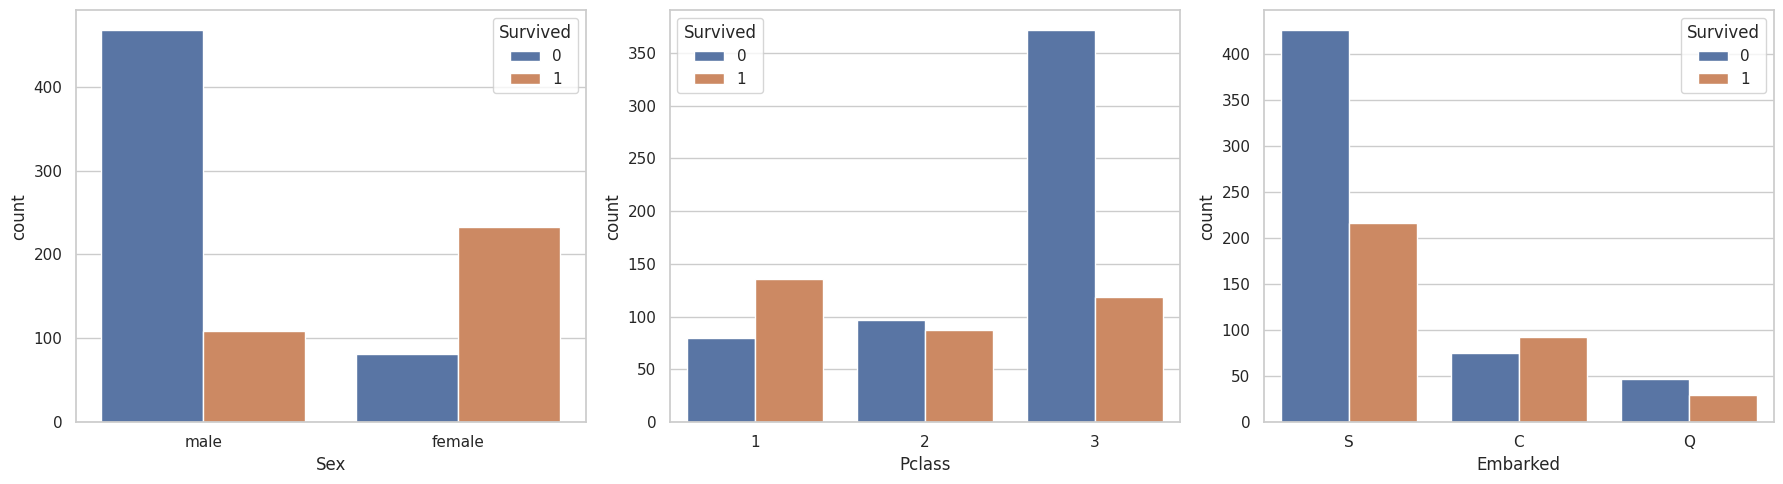

In [300]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=df, x="Sex", hue="Survived", ax=axes[0])
sns.countplot(data=df, x="Pclass", hue="Survived", ax=axes[1])
sns.countplot(data=df, x="Embarked", hue="Survived", ax=axes[2])

plt.tight_layout()
plt.show()


Les femmes ont plus de chances de survie que les hommes, la classe compte aussi beaucoup (Les riches ont plus survecu)

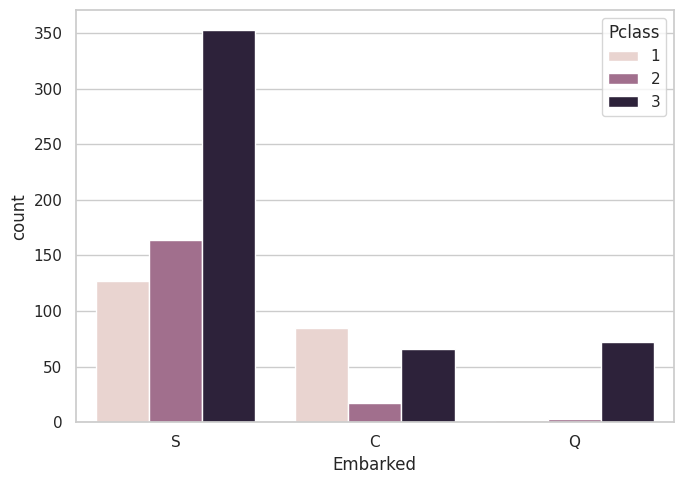

In [301]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

sns.countplot(data=df, x="Embarked", hue="Pclass", ax=ax)

plt.tight_layout()
plt.show()


On a un taux superieur de survie pour les gens qui ont embarque en c parcequ'ils sont majoritairement riche

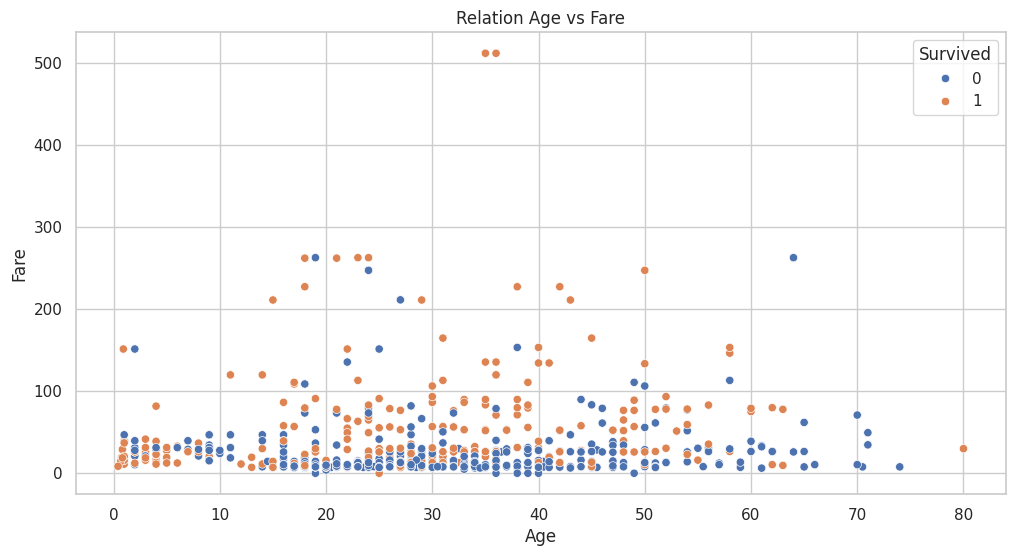

In [302]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title('Relation Age vs Fare')
plt.show()


Plus ton billet est chere plus tu as des chances de survie

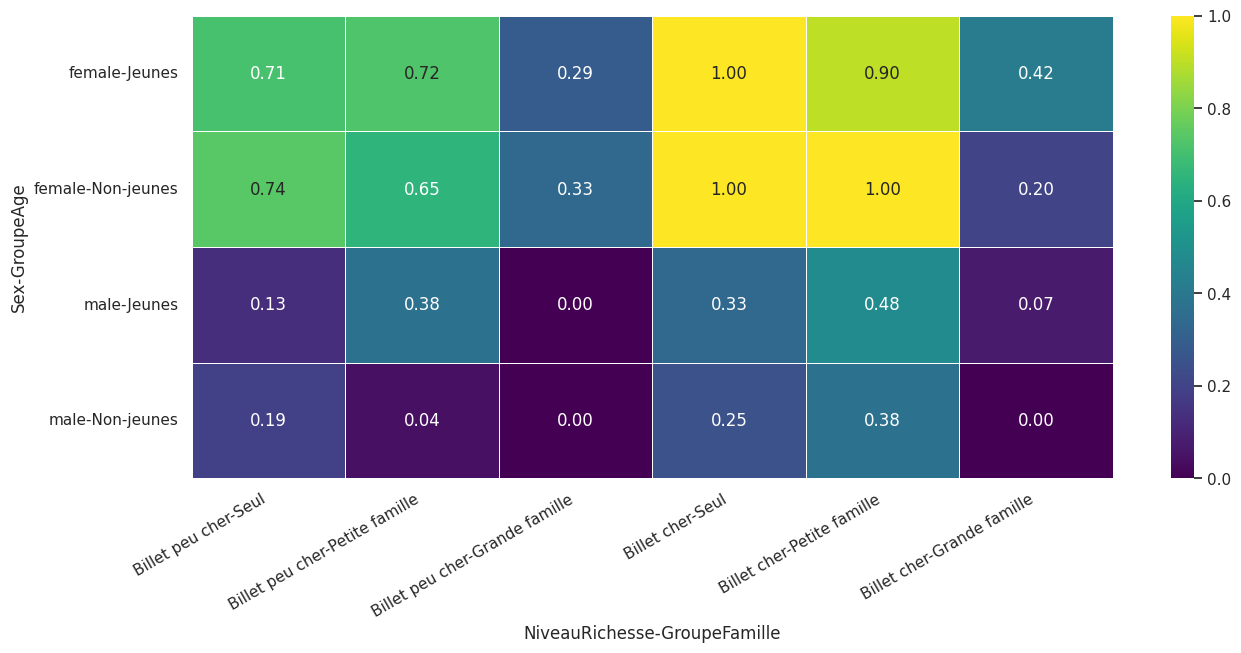

In [303]:
df_analyse = df.copy()

df_analyse["GroupeAge"] = pd.cut(
    df_analyse["Age"],
    bins=[0, 30, 80],
    labels=["Jeunes", "Non-jeunes"]
)

df_analyse["FamilySize"] = df_analyse["SibSp"] + df_analyse["Parch"] + 1

df_analyse["GroupeFamille"] = pd.cut(
    df_analyse["FamilySize"],
    bins=[0, 1, 4, 11],
    labels=["Seul", "Petite famille", "Grande famille"]
)

df_analyse["NiveauRichesse"] = pd.cut(
    df_analyse["Fare"],
    bins=[-1, df["Fare"].quantile(0.75), df["Fare"].max()],
    labels=["Billet peu cher", "Billet cher"]
)

pivot = df_analyse.pivot_table(
    values="Survived",
    index=["Sex", "GroupeAge"],
    columns=["NiveauRichesse", "GroupeFamille"],
    aggfunc="mean"
)

plt.figure(figsize=(14, 7))

ax = sns.heatmap(
    pivot,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    linewidths=0.5
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    ha="right"
)

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0
)

plt.tight_layout(pad=2)
plt.show()


ceux qui ont survecu le plus ceslt les vieilles et jeunes femmes riches venu seul et les vieilles femmes riches ayant une petite famille une petite famille

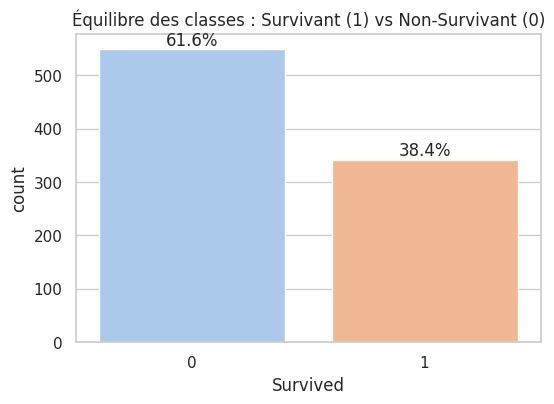

In [304]:

class_counts = df['Survived'].value_counts(normalize=True) * 100


plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Survived', data=df, palette='pastel')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Équilibre des classes : Survivant (1) vs Non-Survivant (0)')
plt.show()

On a des classes plus ou moins desiquilibre

### Nettoyage

In [305]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


ces colonnes sont inutiles pour notre modele car trop de donnees manquent ou ne servent a rien

In [306]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])


On nettoe les colonnes vides par la medianne et l'endroit d'embarquement

In [307]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


Maintenant on vas transformer le sexe et embarked en valeurs numeriques

In [308]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

on transforme embarked en valeurs numeriques mais pour eviter une correlation forte on supprime une colonne vu que les donnees sont en 0 et 1 si les 2 conlonnes presentes sont a 0 cest forcement la colonne supprime

In [309]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

On normalise age et fare car leurs donnees numeriques sont trop grandes et en dl ca risque d'ecraser dans la prediction d'autres donnees tels que le sexe(entre 0 et 1) et donc fausser nos predictions

In [310]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_Q,0
Embarked_S,0


In [311]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,-0.565736,1,0,-0.502445,False,True
1,1,1,1,0.663861,1,0,0.786845,False,False
2,1,3,1,-0.258337,0,0,-0.488854,False,True
3,1,1,1,0.433312,1,0,0.420730,False,True
4,0,3,0,0.433312,0,0,-0.486337,False,True


## Preparation a la prediction

In [312]:


df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)
X = df.drop('Survived', axis=1).values
y = df['Survived'].values
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,-0.565736,1,0,-0.502445,0,1
1,1,1,1,0.663861,1,0,0.786845,0,0
2,1,3,1,-0.258337,0,0,-0.488854,0,1
3,1,1,1,0.433312,1,0,0.420730,0,1
4,0,3,0,0.433312,0,0,-0.486337,0,1


## Construction du modele

In [313]:
def construire_modele(input_dim, neurons1=64, neurons2=32, dropout=0.3, lr=0.001):
    model = Sequential()
    model.add(Dense(neurons1, activation='relu', input_dim=input_dim))
    model.add(Dropout(dropout))
    model.add(Dense(neurons2, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


## Validation croisée K-Fold

In [314]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []



for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = construire_modele(X.shape[1])

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        callbacks=[early_stop],
        verbose=0
    )

    y_pred = (model.predict(X_test) > 0.5).astype(int)

    scores.append({
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred)
    })

pd.DataFrame(scores).mean()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


,0
accuracy,0.814826
precision,0.800140
recall,0.685916
f1,0.737478


## GridSearch

In [315]:

learning_rates = [0.001, 0.0005]
batch_sizes = [16, 32]
neurons = [(64, 32), (128, 64)]
dropouts = [0.2, 0.3]


best_score = 0
best_params = {}

for lr in learning_rates:
    for batch in batch_sizes:
        for n1, n2 in neurons:
            for d in dropouts:
                model = construire_modele(
                    X.shape[1],
                    neurons1=n1,
                    neurons2=n2,
                    dropout=d,
                    lr=lr
                )

                history = model.fit(
                    X, y,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=batch,
                    verbose=0
                )

                score = max(history.history['val_accuracy'])

                if score > best_score:
                    best_score = score
                    best_params = {
                        "learning_rate": lr,
                        "batch_size": batch,
                        "neurons": (n1, n2),
                        "dropout": d
                    }
best_params, best_score


({'learning_rate': 0.001,
  'batch_size': 16,
  'neurons': (128, 64),
  'dropout': 0.2},
 0.8882681727409363)

## Entrainement du modele

In [316]:
model_final = construire_modele(
    input_dim=X.shape[1],
    neurons1=best_params["neurons"][0],
    neurons2=best_params["neurons"][1],
    dropout=best_params["dropout"],
    lr=best_params["learning_rate"]
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model_final.fit(
    X, y,
    validation_split=0.2,
    epochs=50,
    batch_size=best_params["batch_size"],
    callbacks=[early_stop],
    verbose=1
)



Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6571 - loss: 0.6066 - val_accuracy: 0.7989 - val_loss: 0.4869
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7423 - loss: 0.5465 - val_accuracy: 0.8101 - val_loss: 0.4148
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7565 - loss: 0.4983 - val_accuracy: 0.8268 - val_loss: 0.3914
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7938 - loss: 0.4570 - val_accuracy: 0.8492 - val_loss: 0.3765
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7839 - loss: 0.4912 - val_accuracy: 0.8603 - val_loss: 0.3680
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7924 - loss: 0.4775 - val_accuracy: 0.8603 - val_loss: 0.3555
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7856 - loss: 0.4565 - val_accuracy: 0.8603 - val_loss: 0.3534
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8083 - loss: 0.4436 - val_accuracy: 0.8715 - val_loss:

In [317]:
y_pred = (model_final.predict(X) > 0.5).astype(int)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ici vu que la fonction d'activation de notre couche de sortie est une sigmoid on doit fournir un seuil pour la classification  (ici 50%)

## Evaluation du modele

In [318]:

print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))
print(accuracy_score(y, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       549
           1       0.87      0.68      0.77       342

    accuracy                           0.84       891
   macro avg       0.85      0.81      0.82       891
weighted avg       0.84      0.84      0.84       891

[[515  34]
 [108 234]]
0.8406285072951739


Le taux de faux positif est eleve mais notre modele performe assez bien



28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


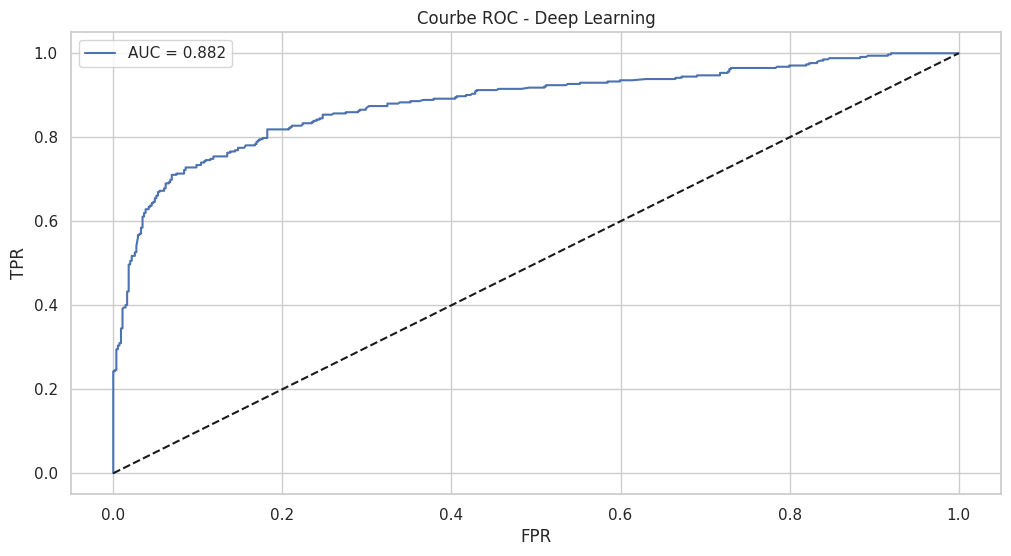

In [319]:

y_prob = model_final.predict(X).ravel()
fpr, tpr, _ = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Courbe ROC - Deep Learning")
plt.legend()
plt.show()


On a un modele vraiment efficace

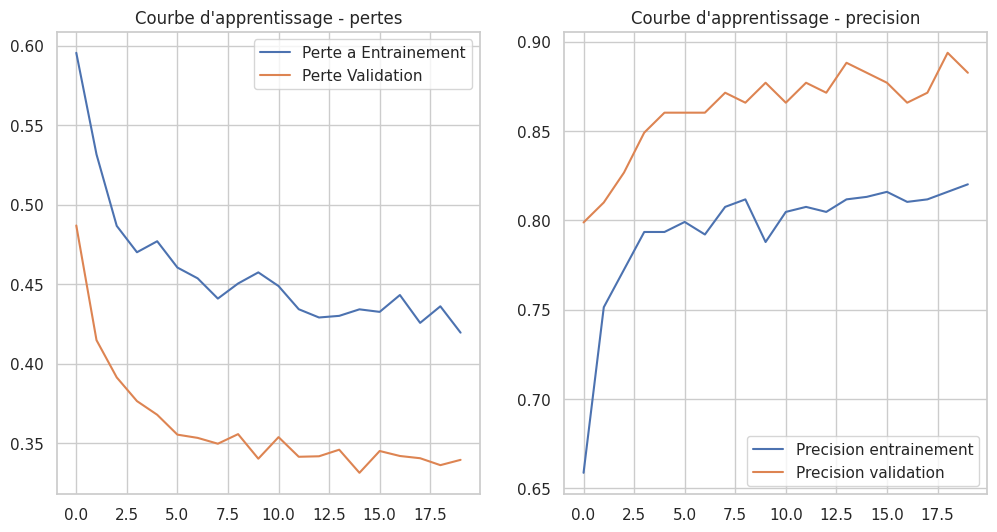

In [320]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte a Entrainement')
plt.plot(history.history['val_loss'], label='Perte Validation')
plt.legend()
plt.title("Courbe d'apprentissage - pertes")
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precision entrainement')
plt.plot(history.history['val_accuracy'], label='Precision validation')
plt.legend()
plt.title("Courbe d'apprentissage - precision")
plt.show()


Le modèle apprend bien. Il n'y a pas de signe de surapprentissage (overfitting) visible ici, car la courbe orange ne remonte pas alors que la bleue continue de descendre. le modele performe mieux sur les donnes qu'il connait pas que sur celles qu'il connait ce qui indique qu'il generalise bien



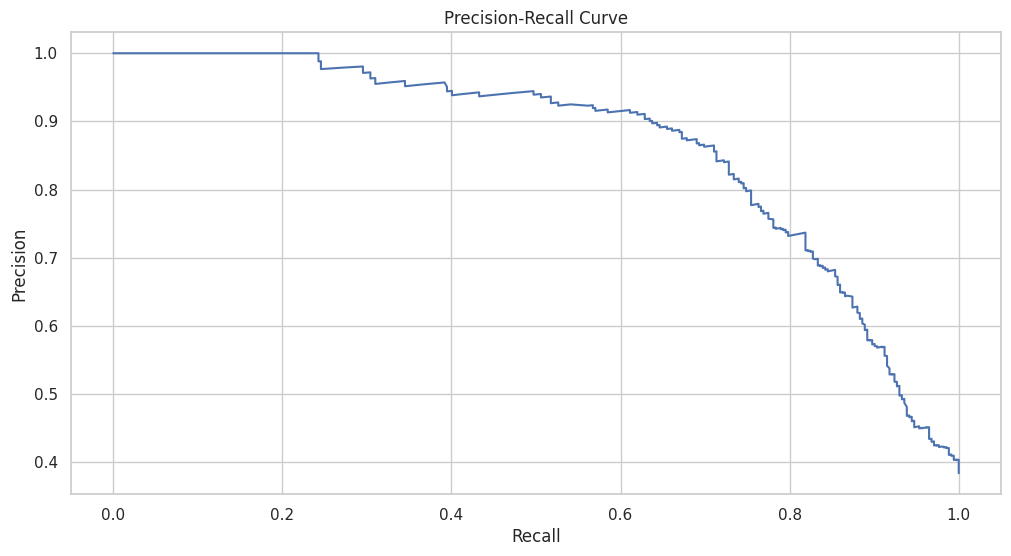

In [321]:

precision, recall, _ = precision_recall_curve(y, y_prob)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

Le modèle est très précis lorsqu’il est prudent, et il offre un bon équilibre au milieu de la courbe. Lorsqu’on cherche à détecter tous les survivants, la précision diminue.

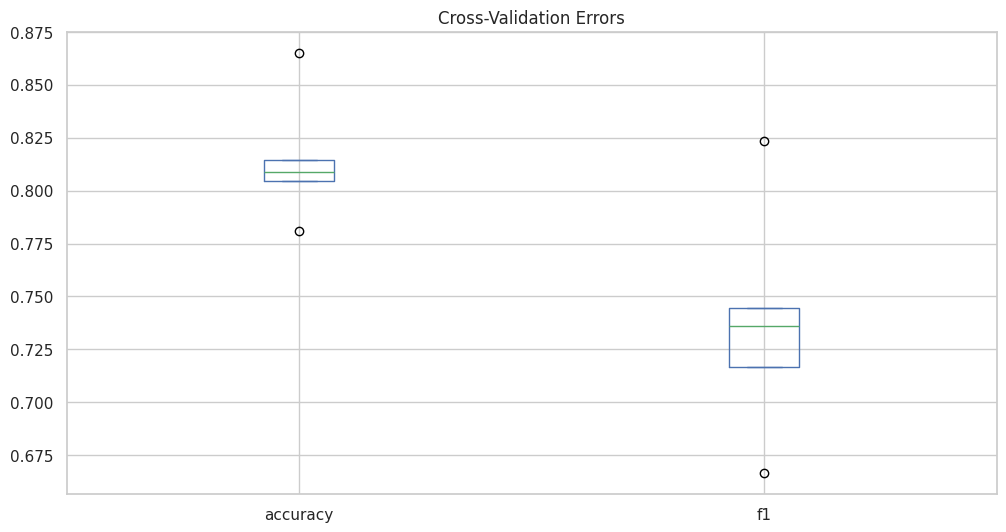

In [322]:
scores_df = pd.DataFrame(scores)

scores_df[['accuracy', 'f1']].plot(kind='box')
plt.title("Cross-Validation Errors")
plt.show()


# Comparaison des Modèles (XGBoost, Random Forest, Deep Learning)

Après avoir exploré en détail XGBoost, Random Forest et l'Apprentissage Profond, et les avoir appliqués à notre problème de survie sur le Titanic, nous pouvons dresser une comparaison de leurs performances et de leurs caractéristiques.

### XGBoost

**Performances Observées (Titanic) :**
*   **Accuracy Moyenne :** 82.73% (sur validation croisée)
*   **Matrice de Confusion :** Bonnes prédictions globales, mais un nombre notable de faux négatifs (prédit la mort pour des survivants).
*   **Courbe ROC (AUC) :** 0.80, indiquant une bonne capacité de discrimination.
*   **Courbe Précision-Rappel (AP) :** 0.775, solide compte tenu du déséquilibre des classes, mais une chute de précision pour des rappels élevés.
*   **Courbe d'Apprentissage :** Un écart entre les courbes d'entraînement et de validation suggère un léger sur-apprentissage sur les données d'entraînement.

**Avantages :**
*   **Rapidité et Optimisation :** Très efficace pour les données tabulaires grâce à ses optimisations (parallélisation, gestion mémoire).
*   **Régularisation Intégrée :** Réduit le sur-apprentissage de manière effective.
*   **Précision :** Souvent parmi les meilleurs algorithmes pour les compétitions et les problèmes structurés.
*   **Gestion des Données Manquantes :** Gère nativement les valeurs manquantes.

**Inconvénients :**
*   **Sensibilité aux Hyperparamètres :** Nécessite un tuning précis pour obtenir les meilleures performances.
*   **Peut sur-apprendre :** Surtout si les hyperparamètres ne sont pas bien ajustés, comme suggéré par notre courbe d'apprentissage.

### Random Forest

**Performances Observées (Titanic) :**
*   **Accuracy de Base :** 79.89% (sur validation)
*   **Accuracy Optimisée :** 81.56% (après `GridSearchCV`)
*   **Matrice de Confusion (Optimisé) :** 97 Vrais Négatifs, 49 Vrais Positifs, avec un bon équilibre entre faux positifs (13) et faux négatifs (20). Taux de vrais positifs (sensibilité) de 0.7101 et taux de vrais négatifs (spécificité) de 0.8818.
*   **Courbe ROC (AUC) :** 0.8284, indiquant une très bonne capacité de discrimination.
*   **Courbe Précision-Rappel (AUC) :** 0.7779, très similaire à XGBoost, montrant une bonne performance pour les classes déséquilibrées.
*   **Courbe d'Apprentissage :** Montre un écart entre les scores d'entraînement et de validation (0.9301 vs 0.8161), suggérant également un certain degré de sur-apprentissage.

**Avantages :**
*   **Robustesse au Sur-apprentissage :** Moins enclin à sur-apprendre qu'un arbre de décision unique grâce à l'agrégation et à l'aléatoire.
*   **Facilité d'Utilisation :** Moins sensible aux hyperparamètres que d'autres modèles.
*   **Importance des Features :** Permet d'évaluer l'importance des variables.
*   **Parallelisation :** L'entraînement des arbres peut être parallélisé, le rendant rapide.

**Inconvénients :**
*   **Interprétabilité :** Moins interprétable qu'un arbre unique.
*   **Performance :** Peut être légèrement surpassé par des méthodes de boosting comme XGBoost sur certains jeux de données si le tuning est poussé à l'extrême.

### Apprentissage Profond (Réseau de Neurones Dense)

**Performances Observées (Titanic) :**
*   **Accuracy Moyenne (K-Fold) :** 81.48%
*   **Accuracy Finale :** 84.06% (sur l'ensemble complet après tuning)
*   **Matrice de Confusion :** 515 Vrais Négatifs, 234 Vrais Positifs, 34 Faux Positifs, 108 Faux Négatifs. Le taux de faux négatifs est le plus élevé parmi les trois modèles, ce qui signifie qu'il a du mal à identifier les survivants.
*   **Courbe ROC (AUC) :** 0.882, le score le plus élevé parmi les trois modèles, suggérant une excellente capacité à distinguer les classes.
*   **Courbe Précision-Rappel :** Indique une bonne précision lorsque le modèle est confiant.
*   **Courbe d'Apprentissage :** Les courbes de perte et de précision montrent un apprentissage stable sans sur-apprentissage évident, et le modèle performe mieux sur les données qu'il n'a pas vues (validation) que sur celles qu'il a vues (entraînement), ce qui est inhabituel mais positif pour la généralisation.

**Avantages :**
*   **Apprentissage Automatique de Features :** Idéal pour les données complexes (images, texte, son).
*   **Haute Précision :** Peut atteindre des performances de pointe avec suffisamment de données et de puissance de calcul.
*   **Flexibilité :** S'adapte à une grande variété de problèmes.

**Inconvénients :**
*   **Complexité :** Plus difficile à interpréter et à entraîner correctement.
*   **Données :** Nécessite généralement un grand volume de données pour exceller.
*   **Ressources :** Demande plus de ressources de calcul.
*   **Sur-apprentissage :** Bien que non observé ici, c'est un risque majeur avec les réseaux profonds.

### Conclusion

Pour ce problème spécifique du Titanic avec des données tabulaires de taille modeste, les trois modèles ont montré des performances respectables, tous avec une accuracy autour de 81-84%.

*   **Le Deep Learning** a affiché le meilleur AUC-ROC final (0.882) et une bonne accuracy, mais avec un nombre plus élevé de faux négatifs (108) par rapport aux autres, ce qui pourrait être critique selon l'application (ici, ne pas prédire la survie pour quelqu'un qui a survécu).
*   **XGBoost** et **Random Forest** ont des performances assez similaires, XGBoost étant légèrement plus précis sur l'accuracy moyenne de validation croisée au départ, et Random Forest ayant un AUC-ROC légèrement supérieur après tuning.

En résumé, pour des problèmes de données tabulaires comme celui-ci, **XGBoost** et **Random Forest** sont des choix excellents et souvent plus rapides à mettre en œuvre et à tuner que l'apprentissage profond, offrant un très bon compromis entre performance et complexité. L'apprentissage profond, bien que très puissant, pourrait être excessif pour ce type de problème, à moins que la structure des données ne soit plus complexe ou que le volume soit bien plus important. Dans ce cas particulier, l'optimisation des hyperparamètres a permis à Random Forest de surpasser légèrement XGBoost en termes d'AUC-ROC et de F1-score sur la validation, tout en restant robuste.